Pour une lecture améliorée, ce notebook est idéalement lu avec un outil qui gère les niveaux des titres Markdown.  
Par exemple avec l'extension 'Table of Contents' du module 'Nbextensions' de Jupyter.

# Prise en main de l'API openfoodfacts

## Install et import

In [150]:
try:
    import openfoodfacts
except:
    !pip install openfoodfacts
    import openfoodfacts

## Tests de l'API

Usage guide :
https://github.com/openfoodfacts/openfoodfacts-python/blob/master/docs/Usage.md

Les facets sont retournés sous forme de listes de dictionnaires.

Les variables sont définies à :
https://world.openfoodfacts.org/data/data-fields.txt

### Requête d'une facette : retourne les modalités d'une variable

In [86]:
additives = openfoodfacts.facets.get_additives()
print(len(additives))
# additives

561


In [1]:
# brands = openfoodfacts.facets.get_brands()
# brands

In [87]:
# openfoodfacts.facets.get_categories()

In [88]:
countries = openfoodfacts.facets.get_countries()
print(len(countries))
#countries

640


In [89]:
# openfoodfacts.facets.get_ingredients()   # erreur dans le code source

In [90]:
languages = openfoodfacts.facets.get_languages()
print(len(languages))
# languages

135


In [91]:
places = openfoodfacts.facets.get_purchase_places()
print(len(places))
# places

4781


In [92]:
stores = openfoodfacts.facets.get_stores()
print(len(stores))
# stores

6436


In [93]:
traces = openfoodfacts.facets.get_traces()
print(len(traces))
# traces

7636


### Requête de produits répondant à une seule modalité de facette

In [77]:
products = openfoodfacts.products.get_by_trace('egg')
print(len(products))
#products

24


In [78]:
products = openfoodfacts.products.get_by_country('France')
print(len(product))
#products

191


In [63]:
ingredient = 'phosphate de calcium'
products_ingredient = openfoodfacts.products.get_by_ingredient(ingredient)
for product in products_ingredient:
    print (product['product_name'])

Mini Fruits
A  Toddler Tout-petits
Almond Dream Almond Milk



### Requête de produits répondant à plusieurs modalités

get_by_facets() : résultat très décevant. La requête ne retourne que 24 produits.

In [79]:
# liste des produits contenant des traces d'oeuf, et country=France
products = openfoodfacts.products.get_by_facets(
#     {'trace': 'egg', 'country': 'france'})
    {'trace': 'egg'})
print(len(products))
#products   # products est une liste de dictionnaires

24


In [58]:
products[1]

{'_id': '4037300108514',
 '_keywords': ['dosensuppen',
  'fertiggerichte',
  'suppen',
  'dosen',
  'in',
  'erasco',
  'konserven',
  'ungarische',
  'gulaschsuppe'],
 'added_countries_tags': [],
 'additives_debug_tags': [],
 'additives_n': 4,
 'additives_old_n': 1,
 'additives_old_tags': ['en:e472e'],
 'additives_original_tags': ['en:e14xx', 'en:e472e', 'en:e412', 'en:e415'],
 'additives_prev_original_tags': [],
 'additives_tags': ['en:e14xx', 'en:e412', 'en:e415', 'en:e472e'],
 'allergens': 'en:gluten,en:milk',
 'allergens_from_ingredients': 'Weizenmehl, Milchzucker, Gerstenmalzextrakt, Milcheiweiß',
 'allergens_from_user': '(de) en:gluten,en:milk',
 'allergens_hierarchy': ['en:gluten', 'en:milk'],
 'allergens_lc': 'de',
 'allergens_tags': ['en:gluten', 'en:milk'],
 'amino_acids_prev_tags': [],
 'amino_acids_tags': [],
 'brands': 'Erasco',
 'brands_tags': ['erasco'],
 'carbon_footprint_percent_of_known_ingredients': '13.4',
 'categories': 'Konserven, Fertiggerichte, Suppen, Fertigge

In [60]:
for product in products:
    print(product['product_name'])
#     print(product['added_countries_tags'])

Adoro Lait
Ungarische Gulaschsuppe
Cioccolato fondente 74%
Darált édespaprika
Biscuit Soja Orange
Cashewkerne
Emincés de poulet
Fromage fondu Les Petits Triangles - 24 portions
Spaghetti Blé & Quinoa - Ail et persil
Sablés nappés chocolat au lait
tarama œufs cabillaud fumé
Cappucino saveur vanille
BISCUITS blé, épeautre et sésame
Eiweißbrötchen
Préparation Falafels Pois Chiches
Hot dog
Mie Nudeln
Black cookies
Pain de mie complet maxi jambon beurre
Palmiers dorés sans sucres ajoutés
Boulghour de riz, légumes et colombo
Mon 1er biscuit au chocolat
Crevettes cuites et décortiquées
Crevettes Décortiquées


In [17]:
products[0].keys()

dict_keys(['_id', '_keywords', 'added_countries_tags', 'additives_debug_tags', 'additives_n', 'additives_old_n', 'additives_old_tags', 'additives_original_tags', 'additives_prev_original_tags', 'additives_tags', 'allergens', 'allergens_from_ingredients', 'allergens_from_user', 'allergens_hierarchy', 'allergens_lc', 'allergens_tags', 'amino_acids_prev_tags', 'amino_acids_tags', 'brands', 'brands_tags', 'categories', 'categories_hierarchy', 'categories_lc', 'categories_old', 'categories_properties', 'categories_properties_tags', 'categories_tags', 'category_properties', 'checkers_tags', 'ciqual_food_name_tags', 'cities_tags', 'code', 'codes_tags', 'compared_to_category', 'complete', 'completeness', 'correctors_tags', 'countries', 'countries_hierarchy', 'countries_lc', 'countries_tags', 'created_t', 'creator', 'data_quality_bugs_tags', 'data_quality_errors_tags', 'data_quality_info_tags', 'data_quality_tags', 'data_quality_warnings_tags', 'data_sources', 'data_sources_tags', 'debug_param_

In [26]:
type(products)

list

### Requête d'un produit en particulier via le barcode

In [54]:
barcode = '3036810201280'
product = openfoodfacts.products.get_product(barcode)
print(product['product']['product_name'])
print("keys du dictionnaire :", list(product.keys()))
product

Dijon Originale
keys du dictionnaire : ['code', 'product', 'status', 'status_verbose']


{'code': '3036810201280',
 'product': {'_id': '3036810201280',
  '_keywords': ['dijon-senf',
   'grocerie',
   'condiment',
   'sauce',
   'maille',
   'dijon',
   'originale',
   'mustard',
   'unspecified'],
  'additives_debug_tags': [],
  'additives_n': 2,
  'additives_old_n': 0,
  'additives_old_tags': [],
  'additives_original_tags': ['en:e330', 'en:e224'],
  'additives_prev_original_tags': ['en:e330', 'en:e224'],
  'additives_tags': ['en:e224', 'en:e330'],
  'allergens': 'en:mustard,de:Kaliummetabisulfit',
  'allergens_from_ingredients': 'Senfkörner, Kaliummetabisulfit',
  'allergens_from_user': '(en) en:mustard,de:Kaliummetabisulfit',
  'allergens_hierarchy': ['en:mustard', 'de:Kaliummetabisulfit'],
  'allergens_lc': 'en',
  'allergens_tags': ['en:mustard', 'de:kaliummetabisulfit'],
  'amino_acids_prev_tags': [],
  'amino_acids_tags': [],
  'brands': 'Maille',
  'brands_tags': ['maille'],
  'categories': 'Lebensmittel, Gewürzmittel, Saucen, Senfe, Dijon-Senfe',
  'categories_hie

### Search

#### Basic search

La méthode search_all() est préférable à search(). La seconde méthode retourne des méta-données en plus de l'itérable.

##### Méthode search()

In [80]:
query = 'mustard maille'
search_result = openfoodfacts.products.search(query)
# search_result

##### Méthode search_all()

In [83]:
query = 'mustard maille'
search_result = openfoodfacts.products.search_all(query)
for product in search_result:
#     print (product['product_name'])
#     display(product)
    pass

#### Advanced Search : non pertinent

### Download data

In [44]:
file_type = 'csv'
openfoodfacts.utils.download_data(file_type)

L'instruction download_data() télécharge le data set dans le dossier ~/user.
Ca a pris 5min17s le 5 mai.

## Conclusion des tests

Les résultats sont décevants. Les requêtes retournent des données incomplètes.
Quant à la fonction de download de data, elle fonctionne et récupère le dataset.

# Prise en main du jeu de données openfoodfacts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import linregress as reg_lin
from os.path import exists

Modification des paramètres d'affichage de Jupyter :

In [2]:
# pour gérer l'affichage des dataframes pandas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 200

# pour gérer l'affichage des arrays numpy
# 230 sur ma config bureau, 165 sur ma config portable
np.set_printoptions(linewidth=165)

# pour afficher les gros fichiers sur toute la largeur de l'écran
from IPython.core.display import HTML
HTML("<style>.container { width:97% }</style>")

## Ouverture du fichier .csv  =>  df1

Pour le fichier csv, on prend connaissance de :  
- son contenu (fonction "display" de IPython).
- ses infos et sa description (méthodes "info" et "describe" de pandas).
- de la qualité des données (fonctions du module missingno).

In [3]:
# Téléchargement du fichier csv contenant le jeu de données openfoodfatcs
download = False    # False pour utiliser le fichier déjà téléchargé    # si True : download complet
          
# si le fichier csv n'existe pas, un download est demandé
if not exists('en.openfoodfacts.org.products.csv') :
    download = True
          
if download :
    # installation de l'API openfoodfacts
    try:
        import openfoodfacts
    except:
        !pip install openfoodfacts
        import openfoodfacts
    # téléchargement du .csv
    file_type = 'csv'
    openfoodfacts.utils.download_data(file_type)     # L'instruction download_data() télécharge le dataset dans le dossier ~/user.

In [4]:
# Chargement du df1 à partir du fichier csv ou à partir d'un pickle
create_pickle = False    # si False : appel du pickle existant    # si True : création du pickle
          
# si le fichier pickle n'existe pas, une création est demandée
if not exists('products.pkl') :
    create_pickle = True
          
if create_pickle :
    # création du pickle
    df1 = pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t', low_memory=False)
    df1.to_pickle('products.pkl')
else : # on charge le pickle
    df1 = pd.read_pickle('products.pkl')

## Affichage de quelques lignes du df

In [5]:
with pd.option_context('display.max_rows', 400, 'display.max_colwidth', 1000):
#     display(df1.tail())
    display(df1.loc[[4]])
#     display(df1.loc[4:5000])

code  \
4  0000000000100   

                                                                                                url  \
4  http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille   

  creator   created_t      created_datetime  last_modified_t  \
4   del51  1444572561  2015-10-11T14:09:21Z       1444659212   

  last_modified_datetime                  product_name  \
4   2015-10-12T14:13:32Z   moutarde au moût de raisin    

  abbreviated_product_name generic_name quantity packaging packaging_tags  \
4                      NaN          NaN     100g       NaN            NaN   

  packaging_text         brands    brands_tags  \
4            NaN  courte paille  courte-paille   

                                categories  \
4  Epicerie, Condiments, Sauces, Moutardes   

                                    categories_tags  \
4  en:groceries,en:condiments,en:sauces,en:mustards   

                          categories_en origins origins_tags origins_en  \
4  Groceries,Condiments,Sauces,Mustards     NaN          NaN        NaN   

  manufacturing_places manufacturing_places_tags         labels  \
4                  NaN                       NaN  Delois france   

        labels_tags         labels_en emb_codes emb_codes_tags  \
4  fr:delois-france  fr:delois-france       NaN            NaN   

  first_packaging_code_geo  cities cities_tags purchase_places         stores  \
4                      NaN     NaN         NaN             NaN  courte paille   

  countries countries_tags countries_en  \
4    France      en:france       France   

                                                                                                                                                                                                                                                        ingredients_text  \
4  eau graines de téguments de moutarde vinaigre de vin rouge sel vin rouge sucre   moût de raisin (6.2%) oignons colorants extraits de carotte et extrait de paprika huile de tournesol son de moutarde sel (cette _moutarde_ uniquement disponible chez courte paille)   

    allergens  allergens_en traces traces_tags traces_en serving_size  \
4  en:mustard           NaN    NaN         NaN       NaN          NaN   

   serving_quantity  no_nutriments  additives_n additives additives_tags  \
4               NaN            NaN          0.0       NaN            NaN   

  additives_en  ingredients_from_palm_oil_n  ingredients_from_palm_oil  \
4          NaN                          0.0                        NaN   

  ingredients_from_palm_oil_tags  ingredients_that_may_be_from_palm_oil_n  \
4                            NaN                                      0.0   

   ingredients_that_may_be_from_palm_oil  \
4                                    NaN   

  ingredients_that_may_be_from_palm_oil_tags  nutriscore_score  \
4                                        NaN              18.0   

  nutriscore_grade  nova_group   pnns_groups_1         pnns_groups_2  \
4                d         NaN  Fat and sauces  Dressings and sauces   

                                                                                                                                                                                                                      states  \
4  en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-completed, en:characteristics-to-be-completed, en:packaging-to-be-completed, en:photos-to-be-validated, en:photos-uploaded   

                                                                                                                                                                                                          states_tags  \
4  en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-completed,en:characteristics-to-be-completed,en:packaging-to-be-completed,en:photos-to-be-validated,en:photos-uploaded  

In [7]:
length = len(df1)
print("length =", length)

length = 1789548


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1789548 entries, 0 to 1789547
Columns: 186 entries, code to carnitine_100g
dtypes: float64(123), int64(2), object(61)
memory usage: 2.5+ GB


In [9]:
# msno.bar(df1)     # trop de colonnes => bug de msno
# msno.matrix(df1)    # fonctionne, mais calcul très long (même avec 32Go de RAM)


## Nettoyage de données

### Suppression des valeurs aberrantes (remplacement par NaN)

La liste suivante contient les variables que nous allons nettoyer, ainsi que les valeurs min/max des intervalles en dehors desquelles les valeurs sont aberrantes.
Les valeurs aberrantes ont été remplacées par des NaN.

In [10]:
liste_variables_pour_nettoyage = [
                ['energy_100g', 0, 3800],     # 3800kJ correspondent à 100g de lipides
                ['sugars_100g', 0, 100],     # il y a au maximum 100g de sucre dans 100g d'aliment
                ['saturated-fat_100g', 0, 100],
                ['sodium_100g', 0, 100],
                ['salt_100g', 0, 100],
                ['fiber_100g', 0, 100], 
                ['proteins_100g', 0, 100], 
                ['carbohydrates_100g', 0, 100],
                ['fat_100g', 0, 100],
                ['cholesterol_100g', 0, 5],     # une valeur supérieure à 5g/100g est aberrante
                ['energy-kj_100g', 0, 3800],
                ['energy-kcal_100g', 0, 900],
                ['monounsaturated-fat_100g', 0, 100],    
                ['polyunsaturated-fat_100g', 0, 100],
                ['trans-fat_100g', 0, 100],    
                ['alcohol_100g', 0, 100],    
                ['vitamin-a_100g', 0, 0.01],    
                ['vitamin-c_100g', 0, 1],    
                ['calcium_100g', 0, 100],    
                ['-lactose_100g', 0, 100],    
                ['iron_100g', 0, 0.1],    
                ['nutriscore_score', -15, 40]]

Exécution du nettoyage

In [11]:
for var in range(len(liste_variables_pour_nettoyage)) :
    nom = liste_variables_pour_nettoyage[var][0]
    min_x = liste_variables_pour_nettoyage[var][1]
    max_x = liste_variables_pour_nettoyage[var][2]
    count_avant = df1[nom].count()
    df1[nom] = df1[nom].apply(lambda x: np.nan if (x < min_x or x > max_x) else x)
    count_apres = df1[nom].count()
    print(f"Variable '{nom}'. Nb de valeurs avant nettoyage : {count_avant}. Nb de valeurs après nettoyage : {count_apres}. Nb de suppressions : {count_avant-count_apres}")

Variable 'energy_100g'. Nb de valeurs avant nettoyage : 1421074. Nb de valeurs après nettoyage : 1415767. Nb de suppressions : 5307
Variable 'sugars_100g'. Nb de valeurs avant nettoyage : 1395484. Nb de valeurs après nettoyage : 1395414. Nb de suppressions : 70
Variable 'saturated-fat_100g'. Nb de valeurs avant nettoyage : 1369630. Nb de valeurs après nettoyage : 1369589. Nb de suppressions : 41
Variable 'sodium_100g'. Nb de valeurs avant nettoyage : 1360234. Nb de valeurs après nettoyage : 1359672. Nb de suppressions : 562
Variable 'salt_100g'. Nb de valeurs avant nettoyage : 1360238. Nb de valeurs après nettoyage : 1359372. Nb de suppressions : 866
Variable 'fiber_100g'. Nb de valeurs avant nettoyage : 470504. Nb de valeurs après nettoyage : 470454. Nb de suppressions : 50
Variable 'proteins_100g'. Nb de valeurs avant nettoyage : 1414005. Nb de valeurs après nettoyage : 1413938. Nb de suppressions : 67
Variable 'carbohydrates_100g'. Nb de valeurs avant nettoyage : 1412516. Nb de vale

### Compréhension des données avec nutriscore_grade A et nutriscore_score élevé

In [12]:
df_nutriscore_a = df1[(df1['nutriscore_grade']=='a')  &  (df1['nutriscore_score']>1.0) ]
df_nutriscore_a.head()

code                                                url  \
41608   0021136010541  http://world-en.openfoodfacts.org/product/0021...   
339468  0632565000012  http://world-en.openfoodfacts.org/product/0632...   
483329  2000000037744  http://world-en.openfoodfacts.org/product/2000...   
614465       27017050  http://world-en.openfoodfacts.org/product/2701...   
652212  3057640183843  http://world-en.openfoodfacts.org/product/3057...   

                           creator   created_t      created_datetime  \
41608   openfoodfacts-contributors  1556127634  2019-04-24T17:40:34Z   
339468                     kiliweb  1520175639  2018-03-04T15:00:39Z   
483329  openfoodfacts-contributors  1477900849  2016-10-31T08:00:49Z   
614465  openfoodfacts-contributors  1457781079  2016-03-12T11:11:19Z   
652212  openfoodfacts-contributors  1533207417  2018-08-02T10:56:57Z   

        last_modified_t last_modified_datetime                 product_name  \
41608        1606745169   2020-11-30T14:06:09Z                 Agua Mineral   
339468       1614617616   2021-03-01T16:53:36Z  Fiji Natural Artesian Water   
483329       1582745934   2020-02-26T19:38:54Z                 Spring water   
614465       1621065813   2021-05-15T08:03:33Z                     Rocheval   
652212       1614952455   2021-03-05T13:54:15Z                       Volvic   

       abbreviated_product_name                   generic_name quantity  \
41608                       NaN                            NaN   600 ml   
339468                      NaN                            NaN   500 ml   
483329                      NaN  Hamidiye natural spring water   125 ml   
614465                      NaN                            NaN   0.75 l   
652212                      NaN                            NaN       1l   

                                 packaging                     packaging_tags  \
41608        Pet desechable con taparrosca      pet-desechable-con-taparrosca   
339468  Botella de plastico, en:pet-bottle  botella-de-plastico,en-pet-bottle   
483329                        Plastic,Film                       plastic,film   
614465                 Bouteille,plastique                bouteille,plastique   
652212                         PET Flasche                        pet-flasche   

       packaging_text        brands   brands_tags  \
41608             NaN    Topo Chico    topo-chico   
339468            NaN          fiji          fiji   
483329            NaN  Hamidiye,KLM  hamidiye,klm   
614465            NaN      Rocheval      rocheval   
652212            NaN        Volvic        volvic   

                                               categories  \
41608   Bebidas, Bebidas carbonatadas, Aguas, Aguas de...   
339468                    Boissons, Eaux, Eaux de sources   
483329                   Beverages, Waters, Spring waters   
614465  Beverages, Waters, Spring waters, Mineral wate...   
652212  Getränke, Wasser, Quellwasser, Mineralwasser, ...   

                                          categories_tags  \
41608   en:beverages,en:carbonated-drinks,en:waters,en...   
339468            en:beverages,en:waters,en:spring-waters   
483329            en:beverages,en:waters,en:spring-waters   
614465  en:beverages,en:waters,en:spring-waters,en:min...   
652212  en:beverages,en:waters,en:spring-waters,en:min...   

                                            categories_en  \
41608   Beverages,Carbonated drinks,Waters,Spring wate...   
339468                     Beverages,Waters,Spring waters   
483329                     Beverages,Waters,Spring waters   
614465  Beverages,Waters,Spring waters,Mineral waters,...   
652212  Beverages,Waters,Spring waters,Mineral waters,...   

                                  origins  \
41608                              México   
339468                       Isla de Fiji   
483329                             Turkey   
614465  Source Werretaler,Löhne,Allemagne   
652212                                NaN   

                       

##### Conclusion :
Toutes les valeurs problématiques que j'ai observées proviennent de teneurs en sodium aberrantes. Généralement pour des boissons.
Exemple de bug : Volvic contient 12mg/L de sodium. Mais openfoodfacts le considère à 12g/L ce qui lui donne un score de +10 points.

## Nom des colonnes et disponibilité des données par colonne

Description du dataset après nettoyage

In [13]:
df1_describe = df1.describe(include='all')
display(df1_describe)

code                                                url  \
count          1789548                                            1789548   
unique         1789543                                            1789543   
top     30383354190402  http://world-en.openfoodfacts.org/product/3770...   
freq                 2                                                  2   
mean               NaN                                                NaN   
std                NaN                                                NaN   
min                NaN                                                NaN   
25%                NaN                                                NaN   
50%                NaN                                                NaN   
75%                NaN                                                NaN   
max                NaN                                                NaN   

        creator     created_t      created_datetime  last_modified_t  \
count   1789544  1.789548e+06               1789548     1.789548e+06   
unique    13570           NaN               1539683              NaN   
top     kiliweb           NaN  2020-04-23T17:22:07Z              NaN   
freq    1011220           NaN                    28              NaN   
mean        NaN  1.552554e+09                   NaN     1.587762e+09   
std         NaN  5.051357e+07                   NaN     2.898088e+07   
min         NaN  1.328021e+09                   NaN     1.333873e+09   
25%         NaN  1.520080e+09                   NaN     1.578605e+09   
50%         NaN  1.563829e+09                   NaN     1.587674e+09   
75%         NaN  1.587675e+09                   NaN     1.610994e+09   
max         NaN  1.621127e+09                   NaN     1.621127e+09   

       last_modified_datetime                  product_name  \
count                 1789548                       1711800   
unique                1391779                       1123841   
top      2021-05-01T11:16:01Z  Aceite de oliva virgen extra   
freq                      213                          1263   
mean                      NaN                           NaN   
std                       NaN                           NaN   
min                       NaN                           NaN   
25%                       NaN                           NaN   
50%                       NaN                           NaN   
75%                       NaN                           NaN   
max                       NaN                           NaN   

       abbreviated_product_name                              generic_name  \
count                      4082                                    114499   
unique                     4005                                     83328   
top        6x27,5cl tourtel twi  Pâtes alimentaires de qualité supérieure   
freq                          9                                       284   
mean                        NaN                                       NaN   
std                         NaN                                       NaN   
min                         NaN                                       NaN   
25%                         NaN                                       NaN   
50%                         NaN                                       NaN   
75%                         NaN                                       NaN   
max                         NaN                                       NaN   

       quantity   packaging    packaging_tags              packaging_text  \
count    459733      286432            286402                        4252   
unique    35667       51590             42065                        2543   
top       500 g  Kunststoff  sachet,plastique  1 sachet plastique à jeter   
freq      19859        6538              9107                         101   
mean        NaN         NaN               NaN                         NaN   
std         NaN         NaN               NaN                         NaN   
min    

Définitions récupérées :

In [14]:
definitions = {
"code" : "barcode of the product",     # (can be EAN-13 or internal codes for some food stores), for products without a barcode, Open Food Facts assigns a number starting with the 200 reserved prefix
"url" : "url of the product page on Open Food Facts",
"creator" : "contributor who first added the product",
"created_t" : "date that the product was added (UNIX timestamp format)",
"created_datetime" : "date that the product was added (iso8601 format: yyyy-mm-ddThh:mn:ssZ)",
"last_modified_t" : "date that the product page was last modified",
"product_name" : "name of the product",
"quantity" : "quantity and unit",
"packaging" : "shape, material",
"origins" : "origins of ingredients",
"manufacturing_places" : "places where manufactured or transformed",
"first_packaging_code_geo" : "coordinates corresponding to the first packaging code indicated",
"countries" : "list of countries where the product is sold",
"serving_size" : "serving size in g",
"no_nutriments" : "indicates if the nutrition facts are indicated on the food label",
"additives_n" : "number of food additives",
"nutrition_grade_fr" : "nutrition grade ('a' to 'e'). see https://fr.openfoodfacts.org/nutriscore",
"fruits-vegetables-nuts_100g" : "% of fruits, vegetables and nuts (excluding potatoes, yams, manioc)",
"carbon-footprint_100g" : "carbon footprint (as indicated on the packaging of some products)",
"nutrition-score-fr_100g" : "Nutri-Score FR",     # Nutrition score derived from the UK FSA score and adapted for the French market (formula defined by the team of Professor Hercberg)
"nutrition-score-uk_100g" : "nutrition score defined by the UK Food Standards Administration (FSA)",
"pnns_groups_1" : "parmi les 7 groupes d'aliments du PNNS",     # https://www.mangerbouger.fr/pro/IMG/pdf/livret_civ.pdf
"nova_group" : "Une classification en 4 groupes (1,2,3,4) pour mettre en évidence le degré de transformation des aliments"     # https://fr.openfoodfacts.org/nova
}

In [15]:
print("NOM DES COLONNES".rjust(45,' '), "NOMBRE DE DONNEES".rjust(18,' '), "% DISPONIBLE".rjust(15,' '), "DTYPE".rjust(10,' '), "   DESCRIPTION")
for colonne in df1_describe :
    if colonne in definitions :
        description = definitions[colonne]
    else :
       description = ""
    print(colonne.rjust(45,' '), str(int(df1_describe[colonne]['count'])).rjust(18,' '), "{0:0.3f}".format(df1_describe[colonne]['count']/len(df1)*100).rjust(15,' '), str(df1[colonne].dtype).rjust(10,' '), "   " + description)

                             NOM DES COLONNES  NOMBRE DE DONNEES    % DISPONIBLE      DTYPE    DESCRIPTION
                                         code            1789548         100.000     object    barcode of the product
                                          url            1789548         100.000     object    url of the product page on Open Food Facts
                                      creator            1789544         100.000     object    contributor who first added the product
                                    created_t            1789548         100.000      int64    date that the product was added (UNIX timestamp format)
                             created_datetime            1789548         100.000     object    date that the product was added (iso8601 format: yyyy-mm-ddThh:mn:ssZ)
                              last_modified_t            1789548         100.000      int64    date that the product page was last modified
                       last_modified_datetime

## Notions de calcul du Nutriscore et données correspondantes dans le dataset

## Analyse univariée des variables du dataframe df1

### Histogramme du nutriscore_score

In [16]:
ser = df1['nutriscore_score']

In [17]:
np.sort(ser.unique())

array([-15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
        37.,  38.,  39.,  40.,  nan])

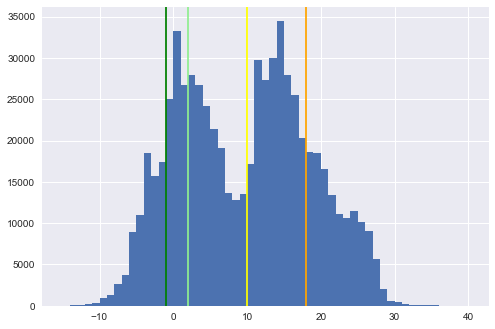

In [18]:
# plotting histogram
bins=range(-15,41)
plt.style.use('seaborn')
plt.hist(ser, bins=bins)
# axvline
plt.axvline(x=-1, color='green')         # grade A solide
plt.axvline(x=2, color='lightgreen')     # grade B solide
plt.axvline(x=10, color='yellow')        # grade C solidec
plt.axvline(x=18, color='orange')        # grade D solide
plt.show()

### Fonction histogramme()

Retourne un histogramme pour une variable (colonne) du df1

Arguments :

    - colonne : string du nom de colonne
    - min_x : valeur min représentée en abcisse
    - max_x : valeur max représentée en abcisse
    - density : si True, trace les fréquences (normées à 1) ; si False, trace les effectifs.
    - type_variable : 'discrète' pour un tracé de type barchart ; 'continue' pour un tracé de type histogramme
    - n_bins : nb d'intervalles (ils peuvent être en-dehors du tracé de l'histogramme)
    - unite : string indiquant l'unité de la variable colonne.

In [174]:
def histogramme(colonne, min_x=None, max_x=None, density=True, type_variable='discrète', n_bins=None, unite=None) :
    
    # extraction du dataframe
    ser = df1[colonne]
    total_count = df1_describe[colonne]['count']

    # ser_min, ser_max    # l'histogramme tient compte des bins en dehors du tracé
    ser_min = ser.min()
    ser_max = ser.max()
        
    # type_variable
    if type_variable == 'discrète' :     # on trace un bar chart centré sur la valeur centrale plutôt qu'un "vrai" histogramme
        align = 'left'
        rwidth = 0.8
        bins = range(int(ser_min), int(ser_max+1))     # il y a autant de bins que de modalités de la variable discrète
    elif type_variable == 'continue':  
        align = 'mid'
        rwidth = 1.0
        if n_bins is None:
            nb_bins = int(np.log2(total_count)+1)     # Règle de Sturges
        else:
            nb_bins = n_bins
        bins=[( ser_min + x*(ser_max-ser_min)/nb_bins ) for x in range(0, nb_bins)]     # nb_bins espacés linéairement
    
    # titre
    if density == True :
        if type_variable == 'discrète' :
            plt.title(label='Fréquence de la variable " '+colonne+' "  (Effectif total = '+str(int(total_count))+')')
        elif type_variable == 'continue':  
            plt.title(label='Densité de probabilité de la variable " '+colonne+' "  (Effectif total = '+str(int(total_count))+')')
    else :
        plt.title(label='Distribution de la variable " '+colonne+' "  (Effectif total = '+str(int(total_count))+')')
        
    # plotting
    plt.style.use('seaborn')
    plt.hist(ser, bins=bins, density=density, label=colonne, align=align, rwidth=rwidth)
    plt.legend()
    plt.xlim(min_x, max_x) 
    label_x = colonne if unite is None else colonne+f" ({unite})"
    plt.xlabel(label_x)
    plt.show()    

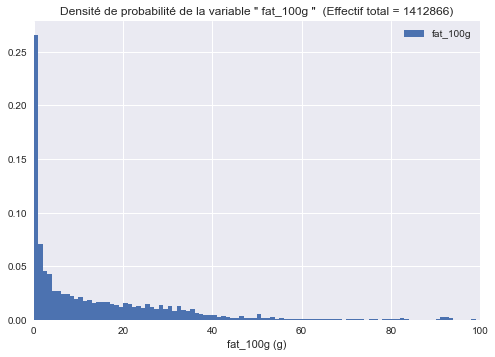

In [175]:
# Test de la fonction histogramme()
histogramme('fat_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100, unite='g')

### Fonction boite_moustaches()

Retourne un boxplot pour une variable (colonne) du df1.  
Marque la moyenne avec un point rouge.
Affiche les valeurs : moyenne, médiane, écart-type (empirique).

Arguments :  
- colonne : string du nom de colonne  
- min_x : valeur min représentée en abcisse  
- max_x : valeur max représentée en abcisse  
- unite : string indiquant l'unité de la variable colonne.

In [176]:
def boite_moustaches(colonne='energy-kj_100g', min_x=None, max_x=None, unite=None) :
    plt.style.use('seaborn')

    # extraction du dataframe
    ser = df1[colonne]
    ser.dropna(inplace=True)
    
    # filtration des valeurs aberrantes. On exclue les valeurs à l'extérieur de l'intervalle [min_x, max_x] considérées comme aberrantes.
    largeur = max_x - min_x
    def f_bool(x):
        if x < min_x :
            return False
        elif x > max_x:
            return False
        else:
            return True
    ser_bool = ser.apply(lambda x : f_bool(x))
    total_count = ser_bool.sum()  # nb de valeurs comprises dans l'intervalle [min_x, max_x]
    ser=ser[ser_bool]
    
    # moyenne, médiane, écart-type
    moyenne = ser.mean()   
    mediane = ser.median()
    ecart_type = ser.std()
    
    # plotting boxplot
    plt.boxplot(ser, vert=0)
    plt.xlim(min_x-0.01*largeur,max_x+0.01*largeur) 
    plt.ylim(1.25, 0.75) 
    plt.title(label='Distribution de la variable " '+colonne+' "  (Effectif total = '+str(int(total_count))+')')
    plt.yticks(ticks=[1], labels=[''])
    label_x = colonne if unite is None else colonne+f" ({unite})"
    plt.xlabel(label_x)
    # plotting dot "moyenne"
    plt.plot(moyenne, 1, marker='o', markersize=10, color='red')    # le boxplot est tracé à l'ordonnée y=1  # L'axe des y est inversé
    # annotations
    plt.annotate(text="Médiane = {0:0.2f}".format(mediane), xy=(min_x+largeur/20,0.8), color='green')
    plt.annotate(text="Moyenne = {0:0.2f}".format(moyenne), xy=(min_x+largeur/20,0.85), color='red')
    plt.annotate(text="Ecart-type = {0:0.2f}".format(ecart_type), xy=(min_x+largeur/20,0.9), color='blue')
    plt.show()

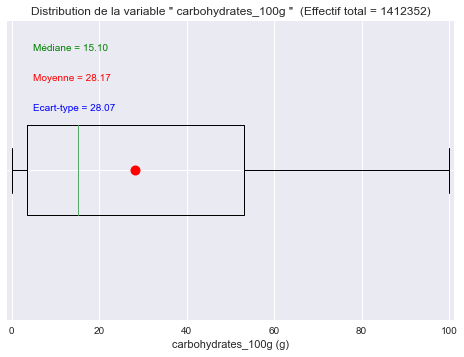

In [177]:
boite_moustaches(colonne='carbohydrates_100g', min_x=0, max_x=100, unite='g')

### Tracé d'histogrammes et de boxplots

#### Variables quantitatives discrètes

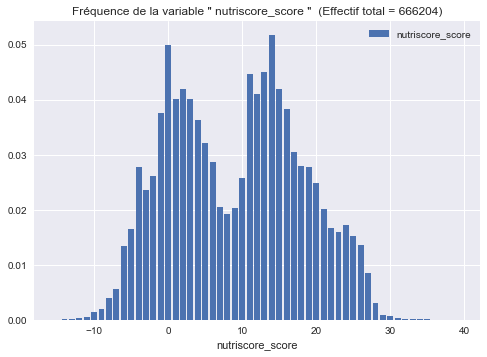

In [178]:
histogramme('nutriscore_score', type_variable='discrète')

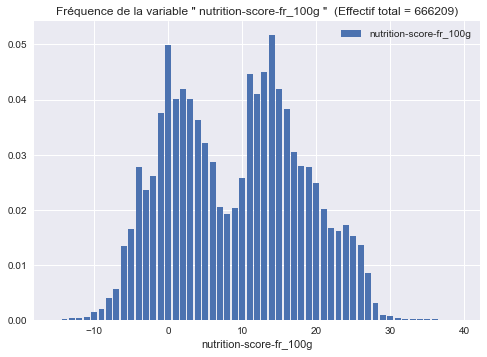

In [179]:
histogramme('nutrition-score-fr_100g', type_variable='discrète')

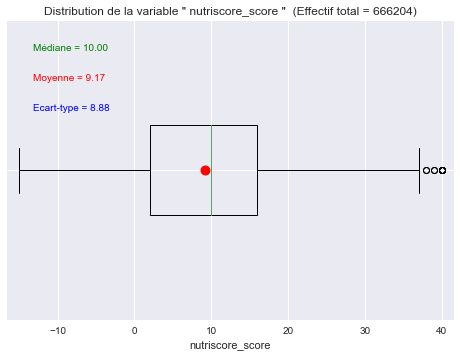

In [180]:
boite_moustaches(colonne='nutriscore_score', min_x=-16, max_x=41)

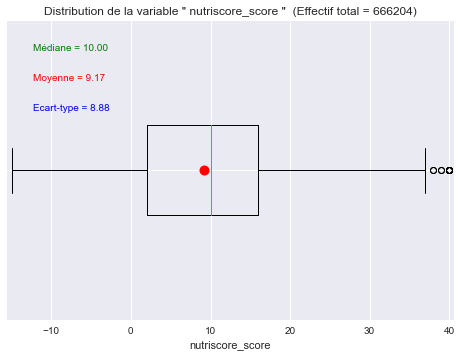

In [181]:
boite_moustaches(colonne='nutriscore_score', min_x=-15, max_x=40)

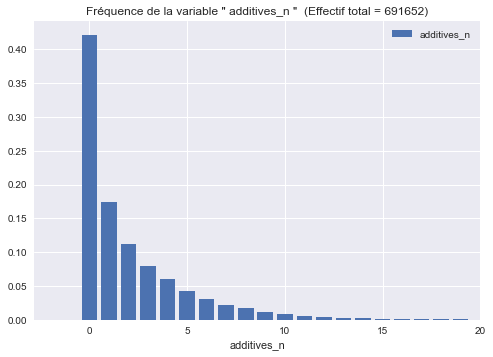

In [182]:
histogramme('additives_n', max_x=20, type_variable='discrète')

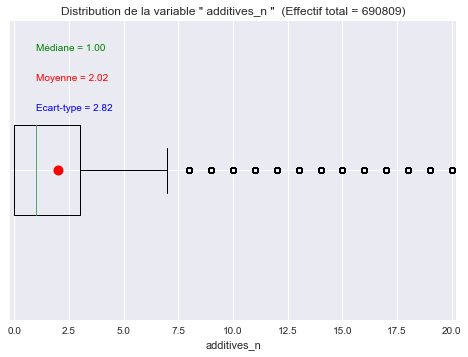

In [183]:
boite_moustaches(colonne='additives_n', min_x=0, max_x=20)

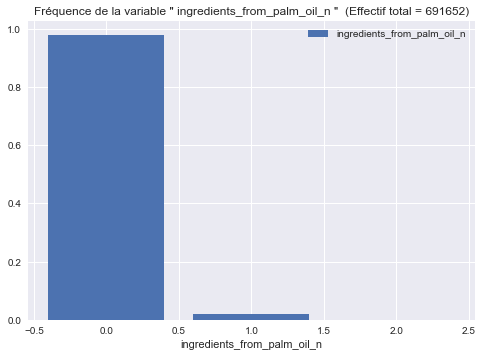

In [184]:
histogramme('ingredients_from_palm_oil_n', type_variable='discrète')

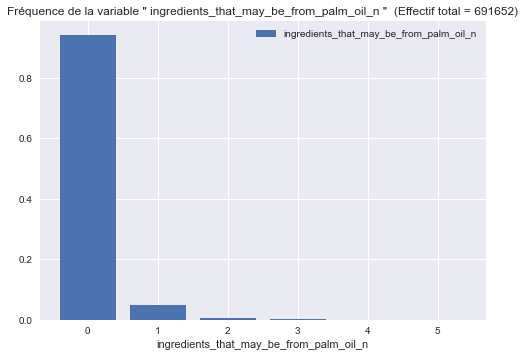

In [186]:
histogramme('ingredients_that_may_be_from_palm_oil_n', type_variable='discrète')

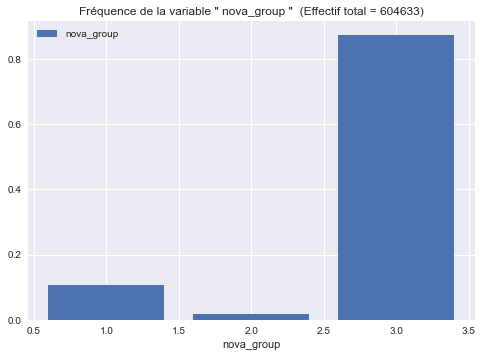

In [187]:
histogramme('nova_group', type_variable='discrète')

#### Variables quantitatives continues

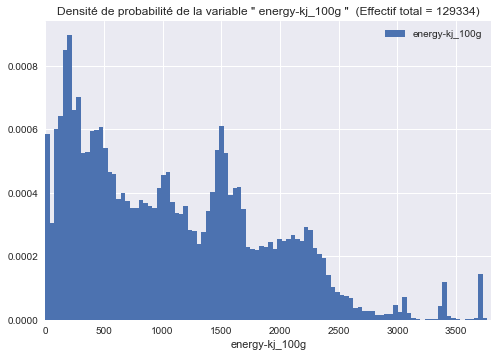

In [188]:
histogramme('energy-kj_100g', type_variable='continue', density=True, min_x=0, max_x=3800, n_bins=100)

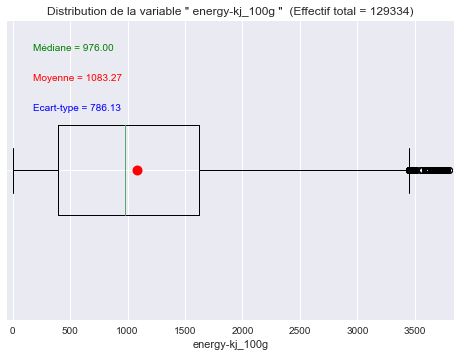

In [189]:
boite_moustaches(colonne='energy-kj_100g', min_x=-10, max_x=3800)

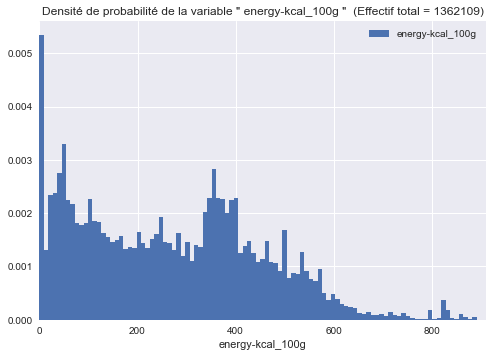

In [190]:
histogramme('energy-kcal_100g', type_variable='continue', density=True, min_x=0, max_x=910, n_bins=100)     # cette variable est erronée (les valeurs sont preque toutes < 0.1)

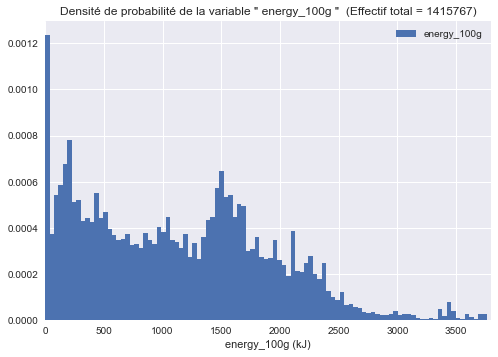

In [191]:
histogramme('energy_100g', type_variable='continue', density=True, min_x=0, max_x=3800, n_bins=100, unite='kJ')

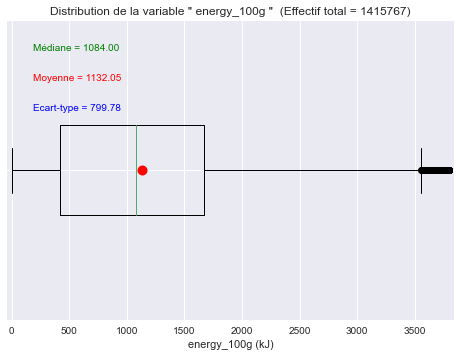

In [192]:
boite_moustaches(colonne='energy_100g', min_x=0, max_x=3800, unite='kJ')

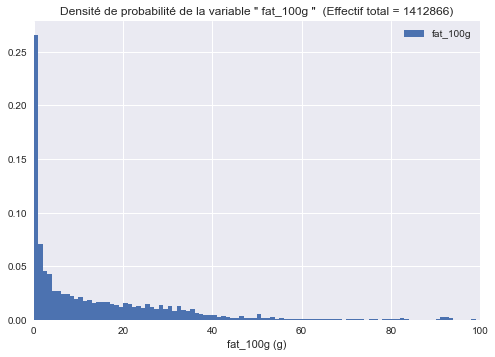

In [193]:
histogramme('fat_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100, unite='g')

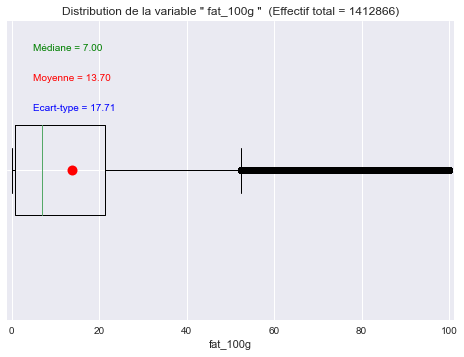

In [194]:
boite_moustaches(colonne='fat_100g', min_x=0, max_x=100)

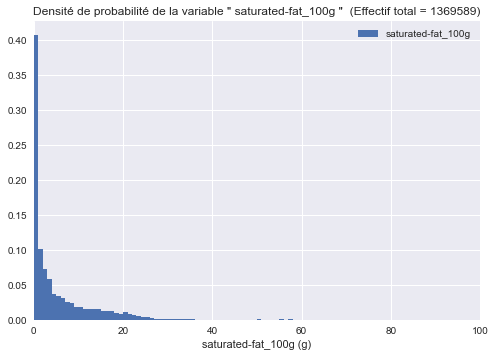

In [195]:
histogramme('saturated-fat_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100, unite='g')

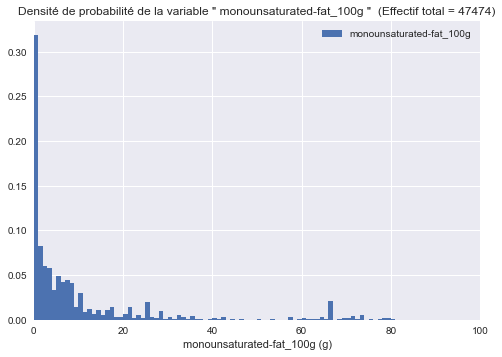

In [196]:
histogramme('monounsaturated-fat_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100, unite='g')

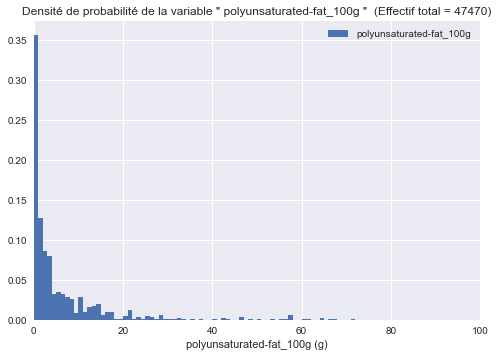

In [197]:
histogramme('polyunsaturated-fat_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100, unite='g')

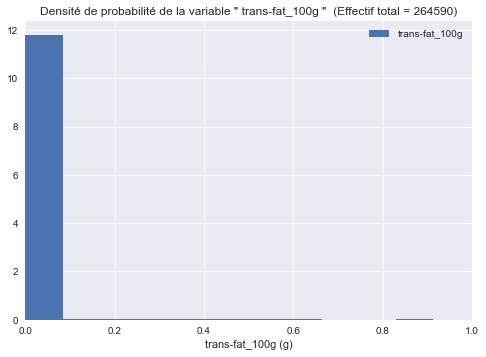

In [198]:
histogramme('trans-fat_100g', type_variable='continue', density=True, min_x=0, max_x=1, n_bins=1000, unite='g')

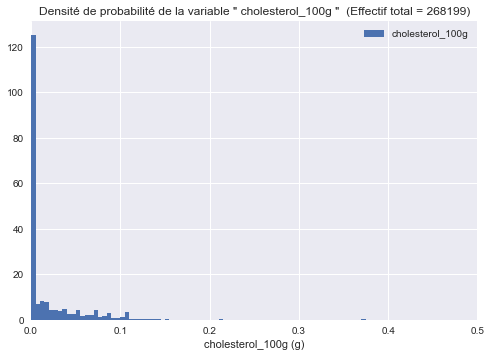

In [199]:
histogramme('cholesterol_100g', type_variable='continue', density=True, min_x=0, max_x=0.5, n_bins=1000, unite='g')

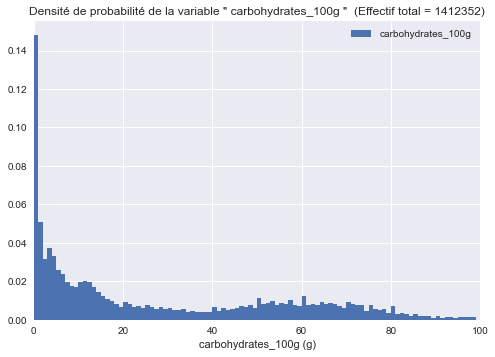

In [200]:
histogramme('carbohydrates_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100, unite='g')

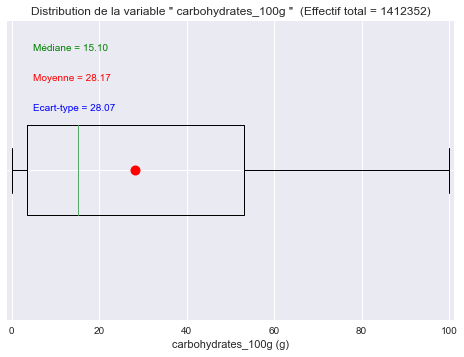

In [201]:
boite_moustaches(colonne='carbohydrates_100g', min_x=0, max_x=100, unite='g')

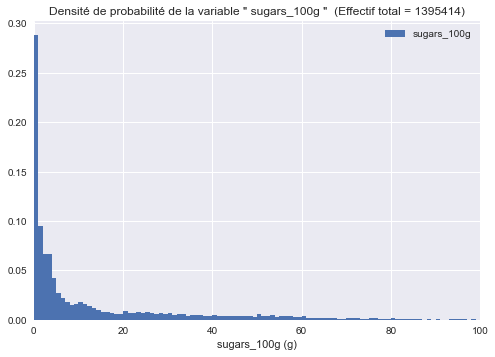

In [202]:
histogramme('sugars_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100, unite='g')

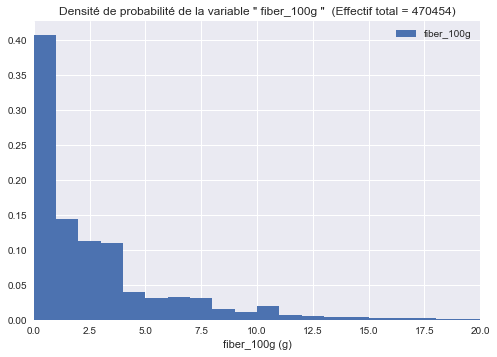

In [203]:
histogramme('fiber_100g', type_variable='continue', density=True, min_x=0, max_x=20, n_bins=100, unite='g')

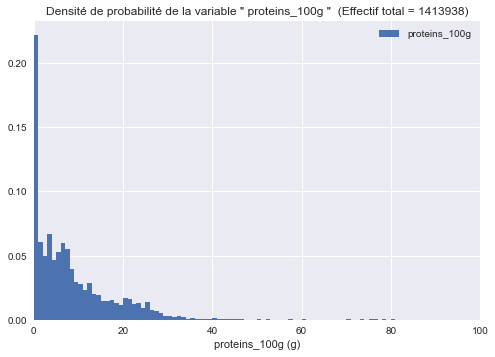

In [204]:
histogramme('proteins_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100, unite='g')

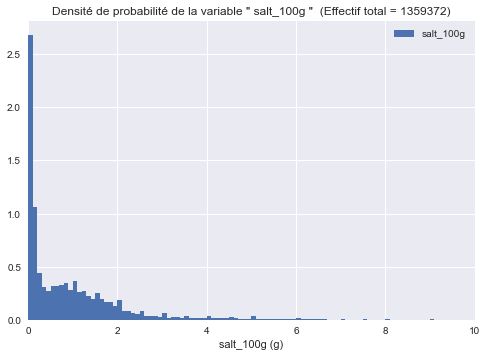

In [205]:
histogramme('salt_100g', type_variable='continue', density=True, min_x=0, max_x=10, n_bins=1000, unite='g')

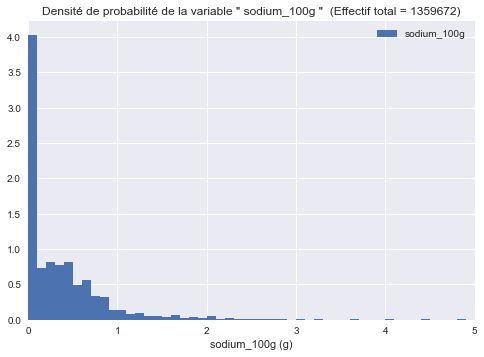

In [206]:
histogramme('sodium_100g', type_variable='continue', density=True, min_x=0, max_x=5, n_bins=1000, unite='g')

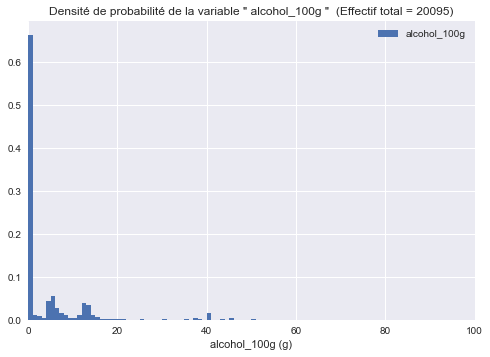

In [207]:
histogramme('alcohol_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100, unite='g')

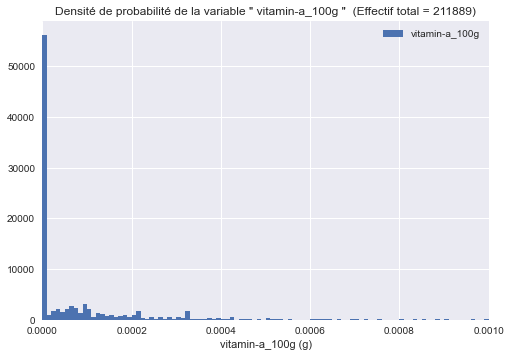

In [208]:
histogramme('vitamin-a_100g', type_variable='continue', density=True, min_x=0, max_x=0.001, n_bins=1000, unite='g')

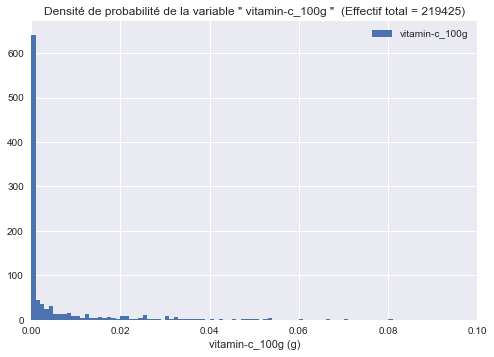

In [209]:
histogramme('vitamin-c_100g', type_variable='continue', density=True, min_x=0, max_x=0.1, n_bins=1000, unite='g')

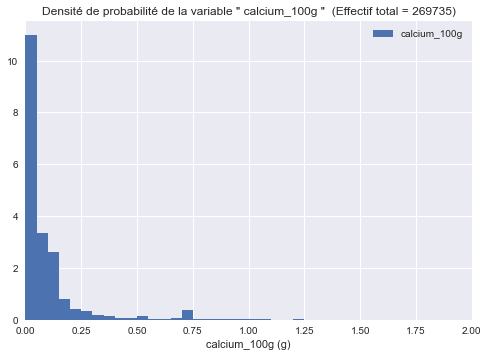

In [210]:
histogramme('calcium_100g', type_variable='continue', density=True, min_x=0, max_x=2, n_bins=2000, unite='g')

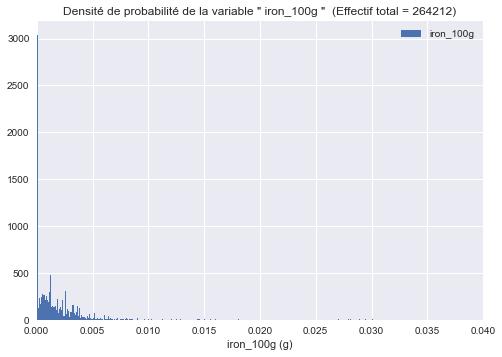

In [211]:
histogramme('iron_100g', type_variable='continue', density=True, min_x=0, max_x=0.04, n_bins=1000, unite='g')

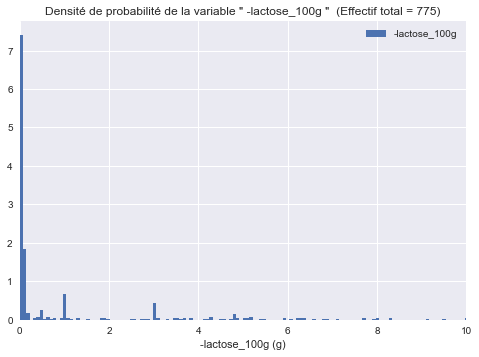

In [212]:
histogramme('-lactose_100g', type_variable='continue', density=True, min_x=0, max_x=10, n_bins=1000, unite='g')

#### Variables qualitatives

##### nutriscore_grade

In [56]:
ser = df1['nutriscore_grade'].value_counts().sort_index()
display(ser)

a    107022
b     84781
c    141617
d    207576
e    125208
Name: nutriscore_grade, dtype: int64

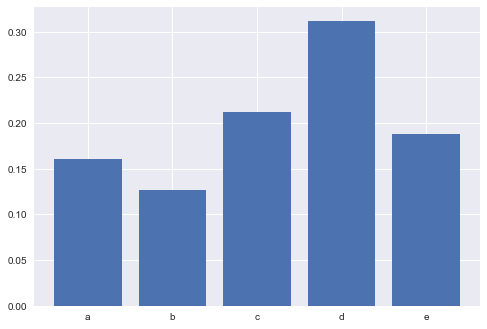

In [57]:
# barplot normalisé
ser = df1['nutriscore_grade'].value_counts(normalize=True).sort_index()
plt.style.use('seaborn')
plt.bar(ser.index, ser.values)
plt.show()

##### pnns_groups_1

In [58]:
ser = df1['pnns_groups_1'].value_counts().sort_index()
ser

Beverages                    64922
Cereals and potatoes         79739
Composite foods              52769
Fat and sauces               67971
Fish Meat Eggs               93291
Fruits and vegetables        46585
Milk and dairy products      87923
Salty snacks                 32111
Sugary snacks               141625
cereals-and-potatoes            56
fruits-and-vegetables         7356
salty-snacks                     6
sugary-snacks                 5377
unknown                    1093160
Name: pnns_groups_1, dtype: int64

In [59]:
# suppression des 'unknown' pour faciliter la normalisation 
ser = df1['pnns_groups_1'].copy()
ser = ser[ser!='unknown']
ser = ser.value_counts(normalize=True).sort_index(ascending=False)
ser

sugary-snacks              0.007910
salty-snacks               0.000009
fruits-and-vegetables      0.010822
cereals-and-potatoes       0.000082
Sugary snacks              0.208354
Salty snacks               0.047241
Milk and dairy products    0.129350
Fruits and vegetables      0.068534
Fish Meat Eggs             0.137247
Fat and sauces             0.099997
Composite foods            0.077632
Cereals and potatoes       0.117310
Beverages                  0.095511
Name: pnns_groups_1, dtype: float64

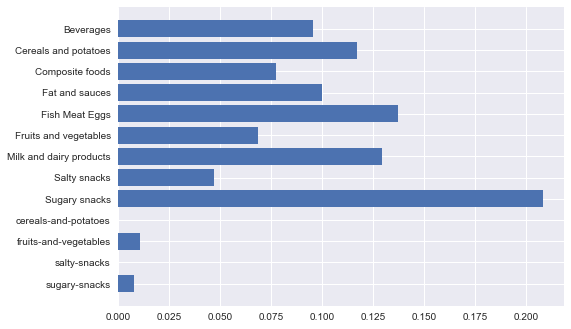

In [60]:
# barplot normalisé
plt.style.use('seaborn')
plt.barh(ser.index, ser.values)
plt.xticks() #(rotation=0)
plt.show()

##### pnns_groups_2

In [61]:
ser = df1['pnns_groups_2'].value_counts().sort_index()
ser

Alcoholic beverages                   15827
Appetizers                            10790
Artificially sweetened beverages       9145
Biscuits and cakes                    60806
Bread                                 21184
Breakfast cereals                      8998
Cereals                               38117
Cheese                                43672
Chocolate products                    13944
Dairy desserts                         6576
Dressings and sauces                  47531
Dried fruits                           5696
Eggs                                   3300
Fats                                  20440
Fish and seafood                      25150
Fruit juices                           8935
Fruit nectars                          1198
Fruits                                15974
Ice cream                              6572
Legumes                                8603
Meat                                  27835
Milk and yogurt                       31103
Nuts                            

In [62]:
# suppression des 'unknown' pour faciliter la normalisation 
ser = df1['pnns_groups_2'].copy()
ser = ser[ser!='unknown']
ser = ser.value_counts(normalize=True).sort_index(ascending=False)
ser

vegetables                          0.010120
pastries                            0.007724
nuts                                0.000009
legumes                             0.000027
fruits                              0.000447
cereals                             0.000053
Waters and flavored waters          0.008936
Vegetables                          0.031934
Unsweetened beverages               0.014143
Teas and herbal teas and coffees    0.002239
Sweets                              0.096060
Sweetened beverages                 0.032391
Soups                               0.003854
Sandwiches                          0.005638
Salty and fatty products            0.019590
Processed meat                      0.051380
Potatoes                            0.004075
Plant-based milk substitutes        0.007854
Pizza pies and quiches              0.000892
Pizza pies and quiche               0.010371
One-dish meals                      0.059789
Offals                              0.001775
Nuts      

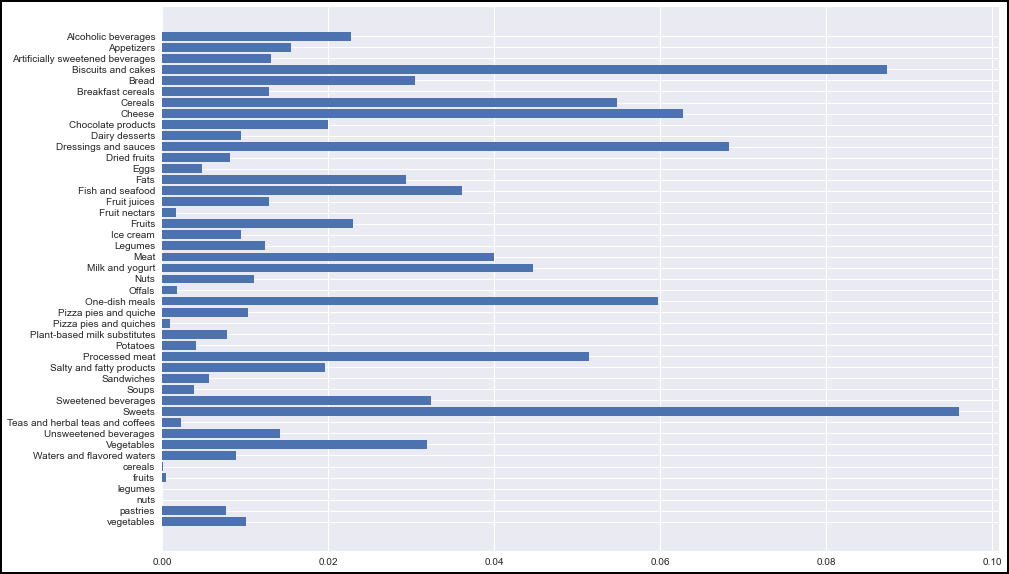

In [63]:
# barplot normalisé
plt.figure(figsize=(15, 10), edgecolor='black', linewidth=4)
plt.style.use('seaborn')
plt.barh(ser.index, ser.values)
plt.yticks(size=10)
plt.show()

##### creator

In [64]:
ser = df1['creator'].value_counts(normalize=True, ascending=True)
ser[-20:]

halal-app-chakib              0.001807
foodrepo                      0.001878
foodless                      0.001962
veganeamos                    0.002735
nutrinet-sante                0.002827
tacinte                       0.003185
swipe-studio                  0.004068
waistline-app                 0.004106
tacite                        0.004840
foodvisor                     0.005432
prepperapp                    0.005648
sebleouf                      0.005761
openfood-ch-import            0.006401
inf                           0.007124
date-limite-app               0.017428
elcoco                        0.018680
org-database-usda             0.075181
openfoodfacts-contributors    0.091529
usda-ndb-import               0.094900
kiliweb                       0.565071
Name: creator, dtype: float64

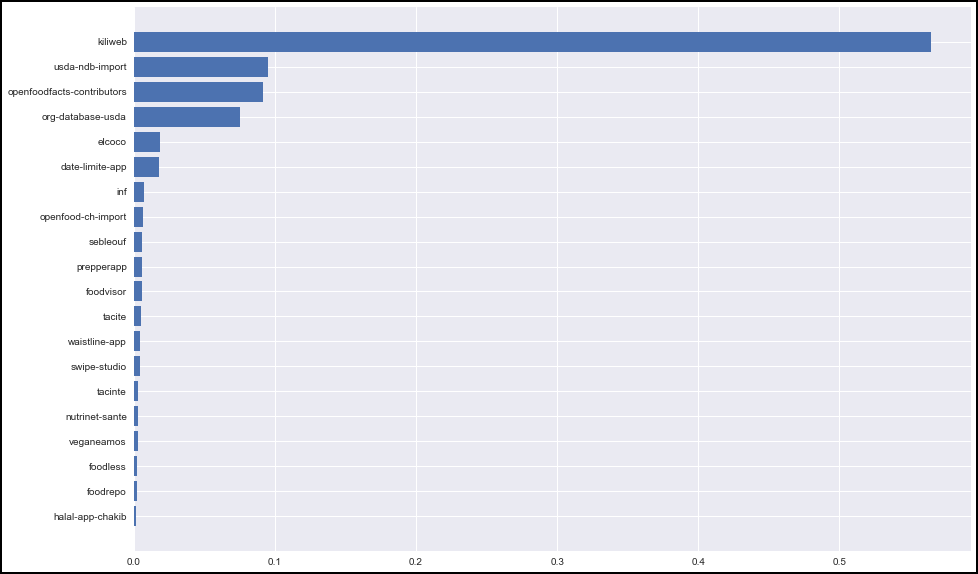

In [65]:
# barplot normalisé des 20 plus gros contributeurs à openfooodfacts
plt.figure(figsize=(15, 10), edgecolor='black', linewidth=4)
plt.style.use('seaborn')
plt.barh(ser.index[-20:], ser.values[-20:])
plt.yticks(size=10)
plt.show()

Note : le contributeur kiliweb est Yuca.

## Analyse bivariée des variables quantitatives du dataframe df1

### Fonction scatter_plot()

Retourne un scatter plot pour deux variables (colonnes) du df1

Arguments :

    - ser_x : série en abcisse.
    - ser_y : série en ordonnée.
    - min_x : valeur min représentée en abcisse.
    - max_x : valeur max représentée en abcisse.
    - min_y : valeur min représentée en ordonnée.
    - max_y : valeur max représentée en ordonnée.
    - alpha : transparence de chaque point.  
    - unite_x : string indiquant l'unité de la série en abcisse.  
    - unite_y : string indiquant l'unité de la série en ordonnée.    

In [217]:
def scatter_plot(ser_x, ser_y, min_x=0, max_x=100, min_y=0, max_y=100, alpha=0.002, unite_x=None, unite_y=None) :

    # filtration des valeurs aberrantes. On exclue les valeurs à l'extérieur de l'intervalle [min_x, max_x], considérées comme aberrantes.
    largeur_x = max_x - min_x
    largeur_y = max_y - min_y
    def f_bool(x, min, max):
        if np.isnan(x) :
            return False
        elif x < min :
            return False
        elif x > max :
            return False
        else:
            return True
    ser_x_bool = ser_x.apply(lambda x : f_bool(x, min_x, max_x))     # vaut True pour les valeurs non aberrantes
    ser_y_bool = ser_y.apply(lambda y : f_bool(y, min_y, max_y))
    ser_xy_bool = ser_x_bool & ser_y_bool     # vaut True pour les valeurs non aberrantes de ser_x et de ser_y, sinon vaut False 
    # ser_x et ser_y sont les séries tracées
    ser_x = ser_x[ser_xy_bool]
    ser_y = ser_y[ser_xy_bool]
    total_count = ser_xy_bool.sum()

    # plotting scatter plot
    plt.style.use('seaborn')
    plt.scatter(ser_x, ser_y, s=1, alpha=alpha)   # la valeur mini de alpha autorisée par pyplot est 0.002
    plt.xlabel(ser_x.name)
    plt.ylabel(ser_y.name)
    plt.title(label='Diagramme de dispersion (Effectif total = '+str(int(total_count))+')')
    plt.ylim(min_y-largeur_y/20,max_y+largeur_y/20)
    label_x = ser_x.name if unite_x is None else ser_x.name+f" ({unite_x})"
    plt.xlabel(label_x)
    label_y = ser_y.name if unite_y is None else ser_y.name+f" ({unite_y})"
    plt.ylabel(label_y)

    # régression linéaire
    slope, intercept, r, p, std_err = reg_lin(ser_x, ser_y)
    model_x = pd.Series([min_x, max_x])
    model_y = slope*model_x + intercept
    plt.plot(model_x, model_y, color='r', linewidth=1, marker=None, linestyle = '-')
    
    plt.annotate(text="Régression linéaire : y = {0:0.4f}*x + {1:0.4f}, R²={2:0.2f}".format(slope, intercept, r*r), xy=(min_x+largeur_x/20,max_y-largeur_y/20), color='red', size=10)
    plt.show()

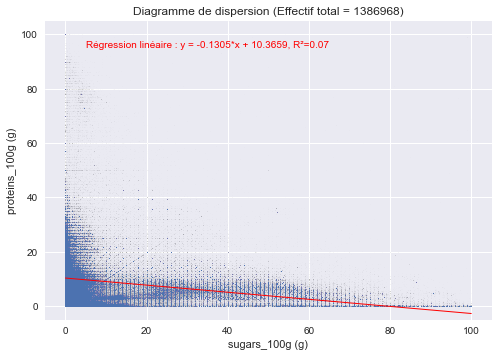

In [219]:
# test de scatter_plot()
scatter_plot(ser_x=df1['sugars_100g'], ser_y=df1['proteins_100g'], unite_x='g', unite_y='g')

### Tracé de scatter plots pour des variables quantitatives continues

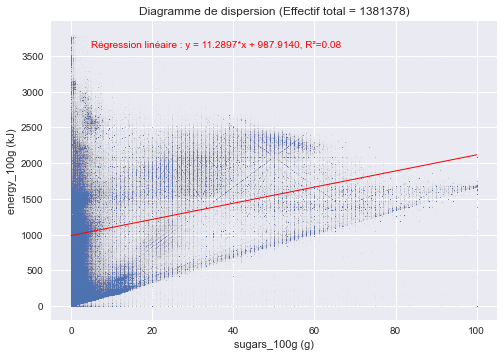

In [220]:
scatter_plot(df1['sugars_100g'], df1['energy_100g'], max_y=3800, unite_x='g', unite_y='kJ')

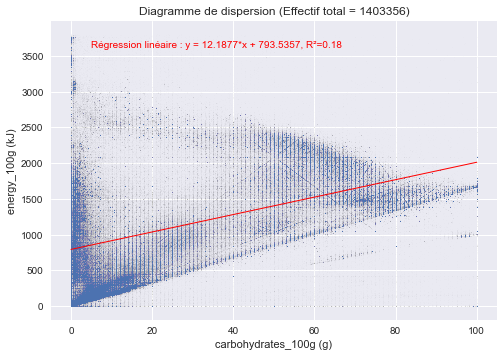

In [223]:
scatter_plot(df1['carbohydrates_100g'], df1['energy_100g'], max_y=3800, unite_x='g', unite_y='kJ')

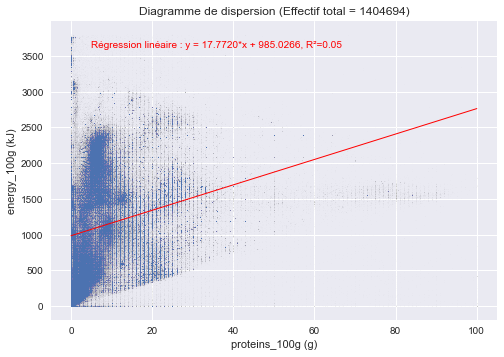

In [222]:
scatter_plot(df1['proteins_100g'], df1['energy_100g'], max_y=3800, unite_x='g', unite_y='kJ')

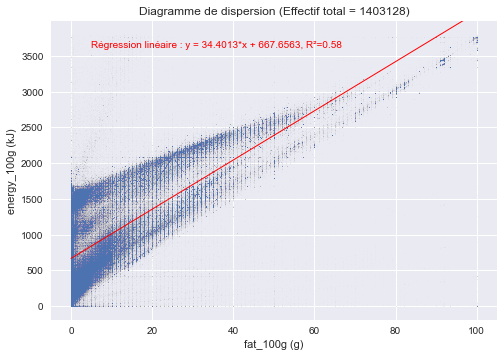

In [224]:
scatter_plot(df1['fat_100g'], df1['energy_100g'], max_y=3800, unite_x='g', unite_y='kJ')

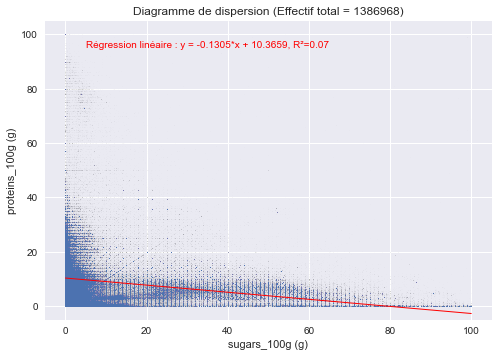

In [225]:
scatter_plot(df1['sugars_100g'], df1['proteins_100g'], unite_x='g', unite_y='g')

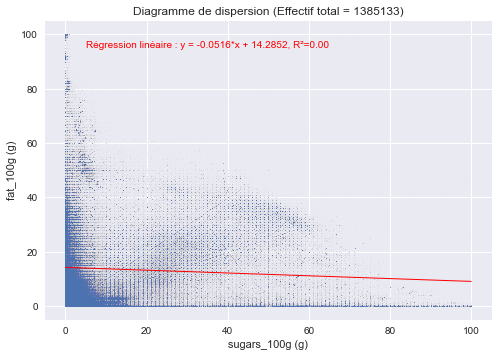

In [226]:
scatter_plot(df1['sugars_100g'], df1['fat_100g'], unite_x='g', unite_y='g')

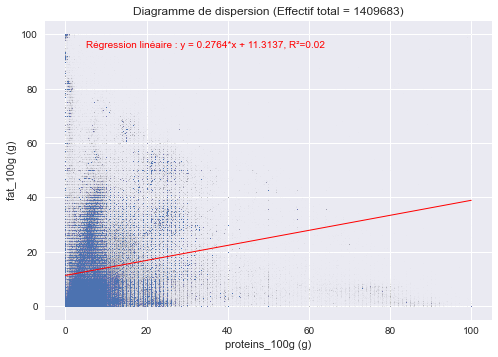

In [227]:
scatter_plot(df1['proteins_100g'], df1['fat_100g'], unite_x='g', unite_y='g')

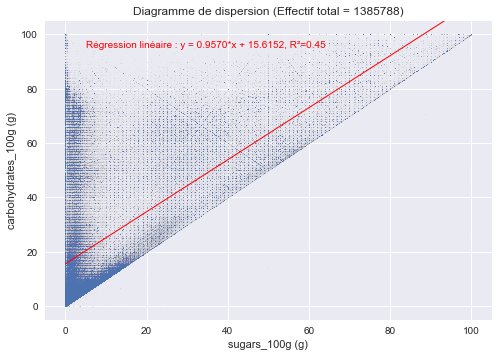

In [228]:
scatter_plot(df1['sugars_100g'], df1['carbohydrates_100g'], unite_x='g', unite_y='g')

Création de la série carbohydrates_not_sugars_100g

In [76]:
serie_carbohydrates_not_sugars_100g = df1['carbohydrates_100g'] - df1['sugars_100g']
serie_carbohydrates_not_sugars_100g.name = 'carbohydrates_not_sugars_100g'

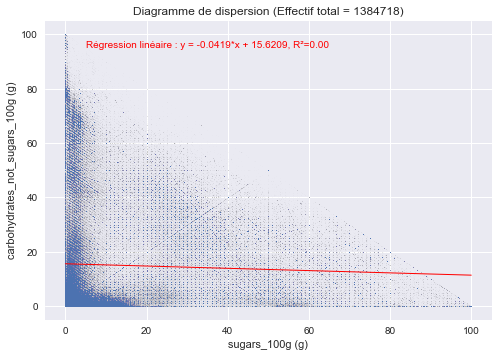

In [229]:
scatter_plot(df1['sugars_100g'], serie_carbohydrates_not_sugars_100g, unite_x='g', unite_y='g')

Création de la série serie_fat_not_saturated_100g

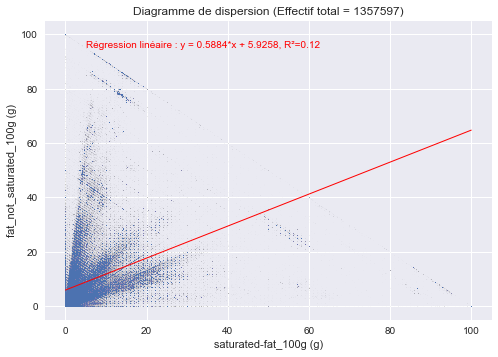

In [230]:
serie_fat_not_saturated_100g = df1['fat_100g'] - df1['saturated-fat_100g']
serie_fat_not_saturated_100g.name = 'fat_not_saturated_100g'
scatter_plot(df1['saturated-fat_100g'], serie_fat_not_saturated_100g, unite_x='g', unite_y='g')

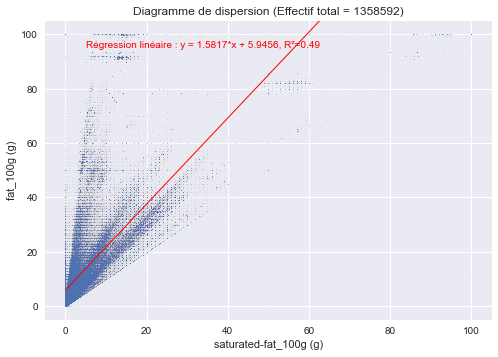

In [231]:
scatter_plot(df1['saturated-fat_100g'], df1['fat_100g'], unite_x='g', unite_y='g')

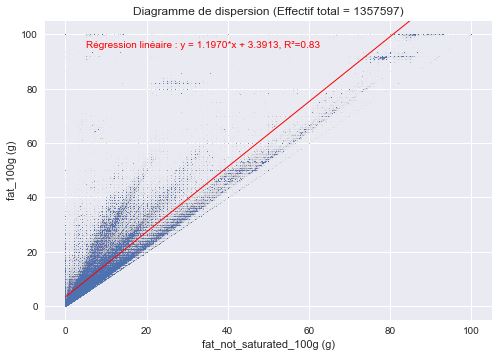

In [232]:
scatter_plot(serie_fat_not_saturated_100g, df1['fat_100g'], unite_x='g', unite_y='g')

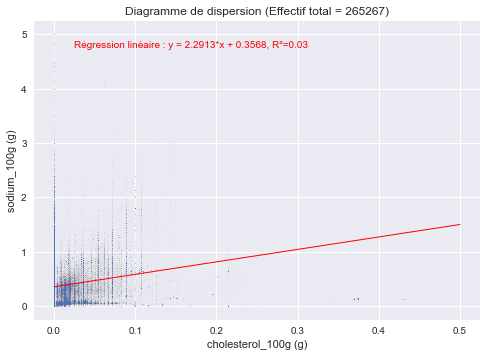

In [233]:
scatter_plot(df1['cholesterol_100g'], df1['sodium_100g'], min_x=0, max_x=0.5, min_y=0, max_y=5, unite_x='g', unite_y='g')

### Tracé de scatter plots avec le nutriscore et les variables qui le composent

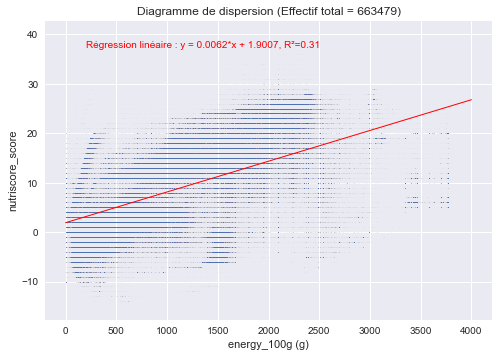

In [234]:
scatter_plot(df1['energy_100g'], df1['nutriscore_score'], min_x=0, max_x=4000, min_y=-15, max_y=40, unite_x='g')

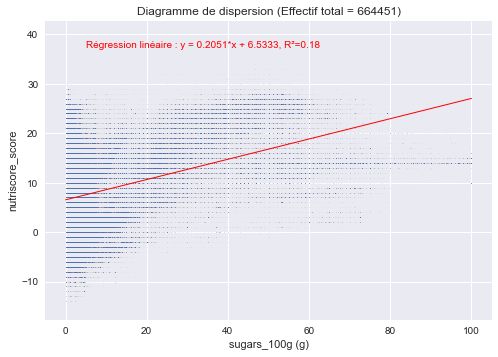

In [235]:
scatter_plot(df1['sugars_100g'], df1['nutriscore_score'], min_y=-15, max_y=40, unite_x='g')

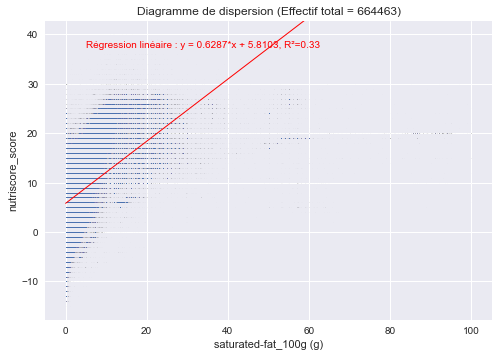

In [236]:
scatter_plot(df1['saturated-fat_100g'], df1['nutriscore_score'], min_y=-15, max_y=40, unite_x='g')

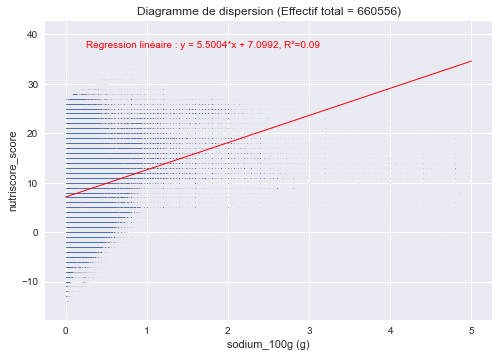

In [237]:
scatter_plot(df1['sodium_100g'], df1['nutriscore_score'], min_y=-15, max_y=40, max_x=5, unite_x='g')

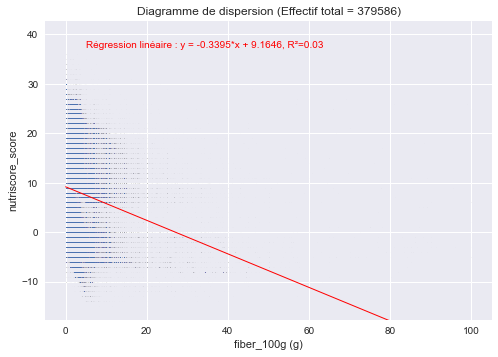

In [238]:
scatter_plot(df1['fiber_100g'], df1['nutriscore_score'], min_y=-15, max_y=40, unite_x='g')

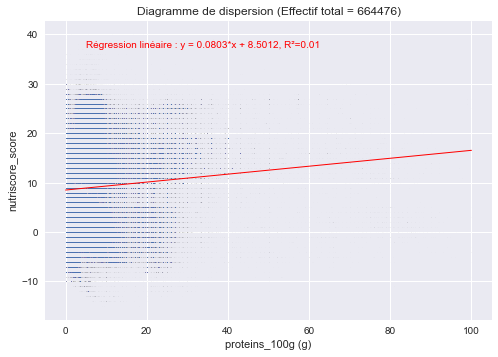

In [239]:
scatter_plot(df1['proteins_100g'], df1['nutriscore_score'], min_y=-15, max_y=40, unite_x='g')

### Recherche de corrélation par force brute sur les variables quantitatives

In [240]:
liste_series = [
                # les 6 séries (sur 7) utilisées dans le calcul du nutriscore
                [df1['energy_100g'], 0, 3800, 'kJ'],
                [df1['sugars_100g'], 0, 100, 'g'],
                [df1['saturated-fat_100g'], 0, 100, 'g'],
                [df1['sodium_100g'], 0, 5, 'g'],
                [df1['fiber_100g'], 0, 100, 'g'], 
                [df1['proteins_100g'], 0, 100, 'g'], 
                
                # autres séries
                [df1['carbohydrates_100g'], 0, 100, 'g'],
                [serie_carbohydrates_not_sugars_100g, 0, 100, 'g'], 
                [df1['fat_100g'], 0, 100, 'g'],
                [serie_fat_not_saturated_100g, 0, 100, 'g'], 
                [df1['cholesterol_100g'], 0, 0.5, 'g'],
    
                [df1['nutriscore_score'], -15, 40, None]]

sugars_100g en fct de energy_100g :


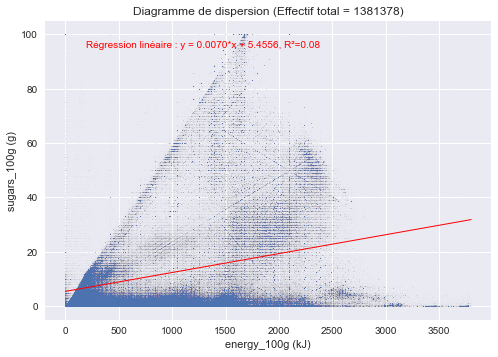

saturated-fat_100g en fct de energy_100g :


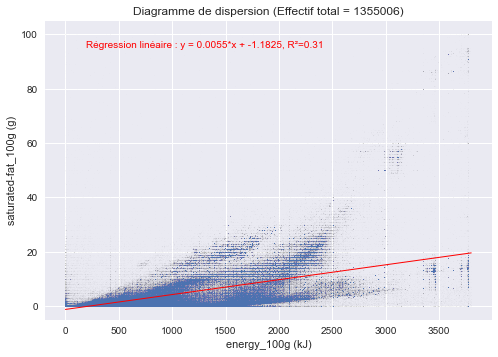

sodium_100g en fct de energy_100g :


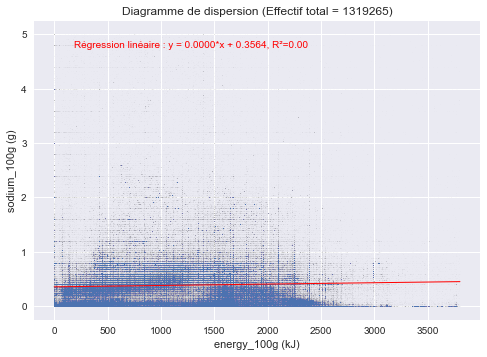

fiber_100g en fct de energy_100g :


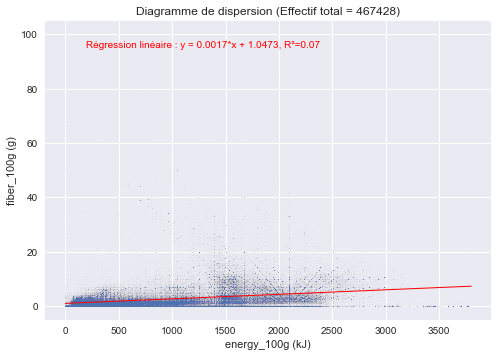

proteins_100g en fct de energy_100g :


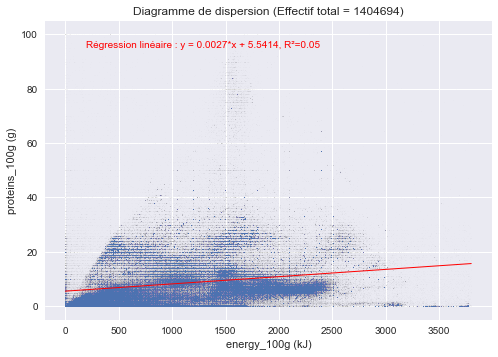

carbohydrates_100g en fct de energy_100g :


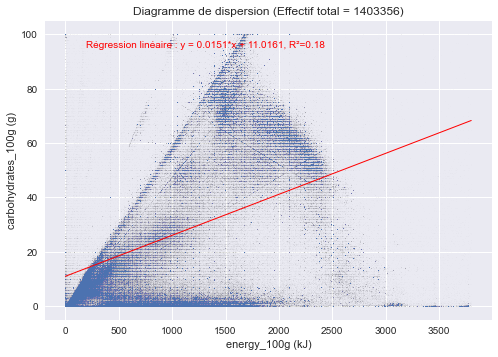

carbohydrates_not_sugars_100g en fct de energy_100g :


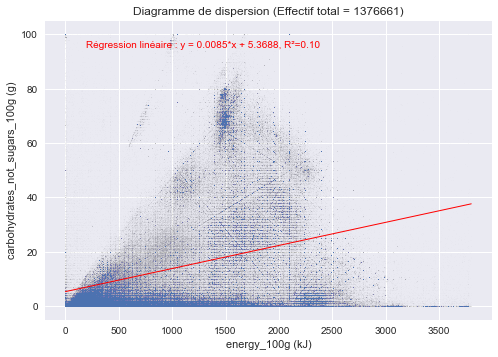

fat_100g en fct de energy_100g :


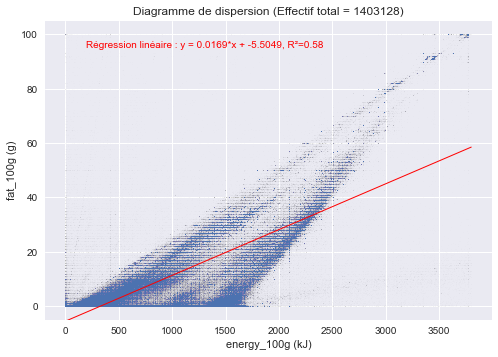

fat_not_saturated_100g en fct de energy_100g :


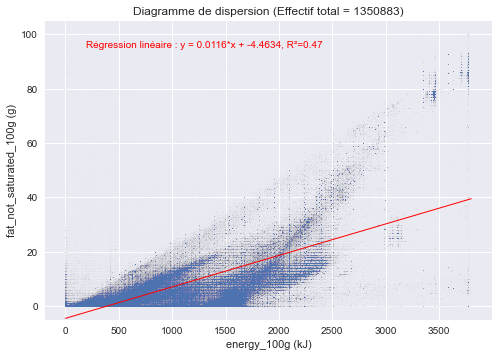

cholesterol_100g en fct de energy_100g :


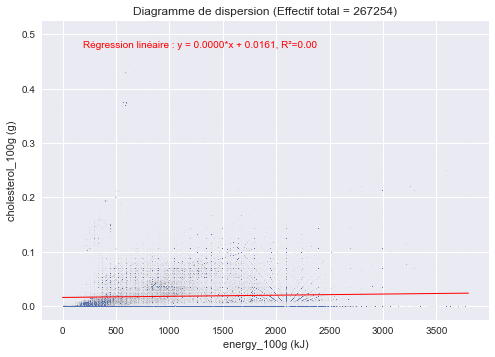

nutriscore_score en fct de energy_100g :


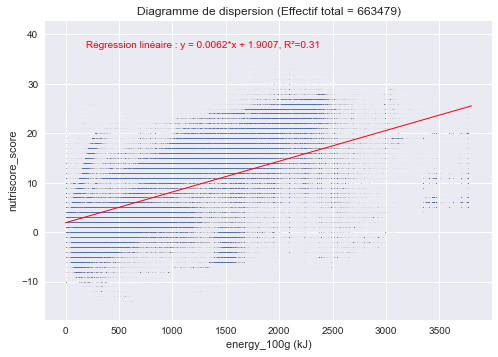

saturated-fat_100g en fct de sugars_100g :


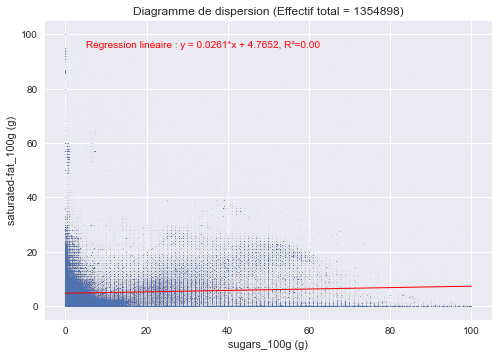

sodium_100g en fct de sugars_100g :


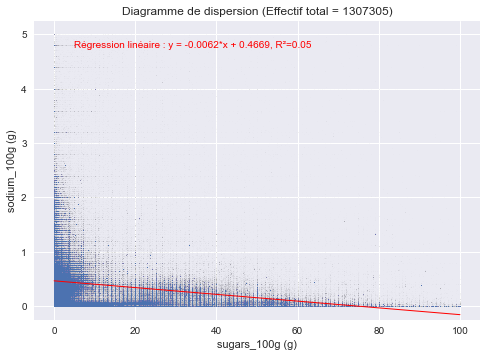

fiber_100g en fct de sugars_100g :


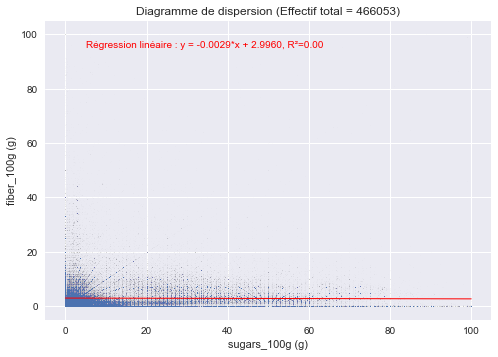

proteins_100g en fct de sugars_100g :


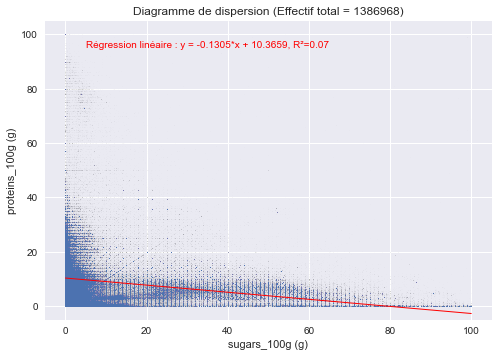

carbohydrates_100g en fct de sugars_100g :


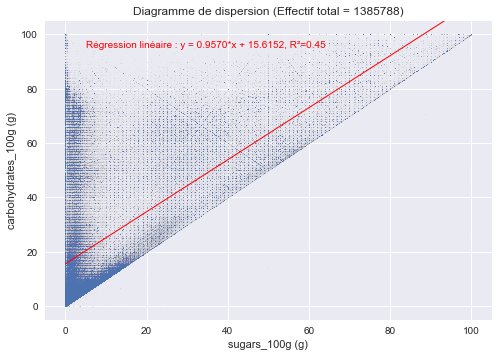

carbohydrates_not_sugars_100g en fct de sugars_100g :


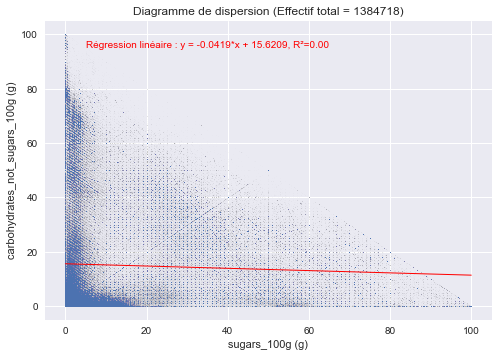

fat_100g en fct de sugars_100g :


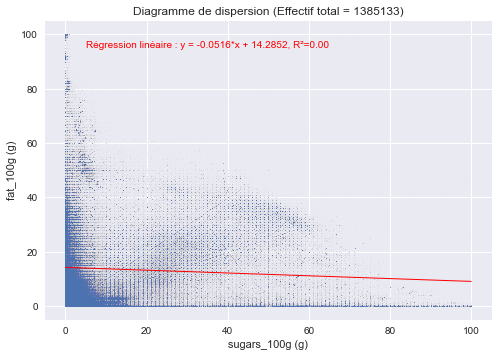

fat_not_saturated_100g en fct de sugars_100g :


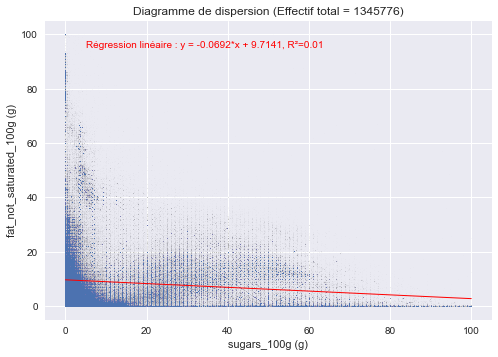

cholesterol_100g en fct de sugars_100g :


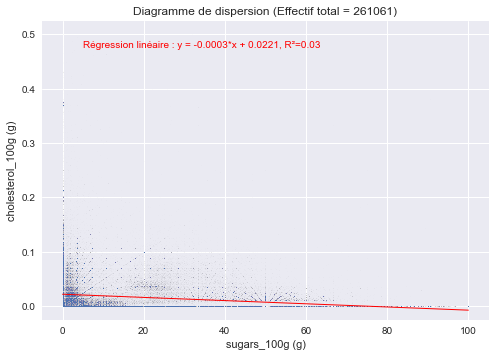

nutriscore_score en fct de sugars_100g :


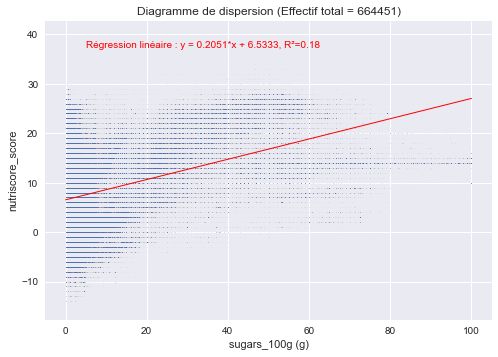

sodium_100g en fct de saturated-fat_100g :


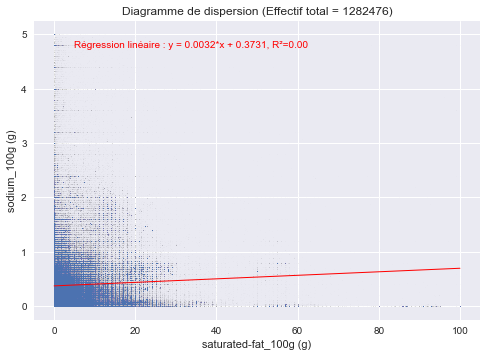

fiber_100g en fct de saturated-fat_100g :


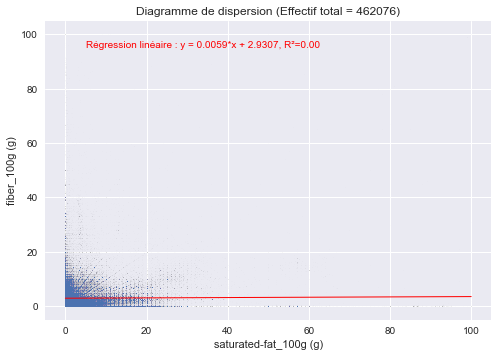

proteins_100g en fct de saturated-fat_100g :


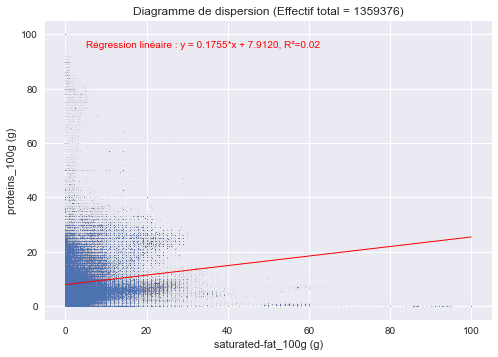

carbohydrates_100g en fct de saturated-fat_100g :


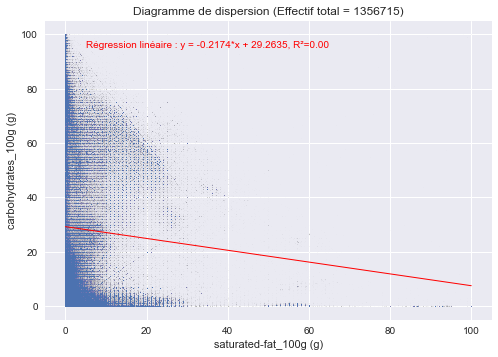

carbohydrates_not_sugars_100g en fct de saturated-fat_100g :


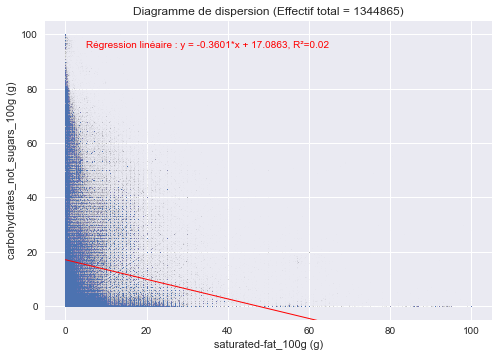

fat_100g en fct de saturated-fat_100g :


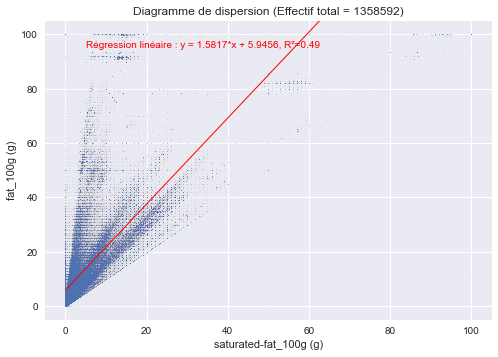

fat_not_saturated_100g en fct de saturated-fat_100g :


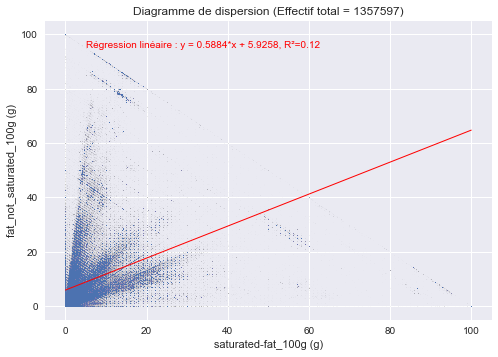

cholesterol_100g en fct de saturated-fat_100g :


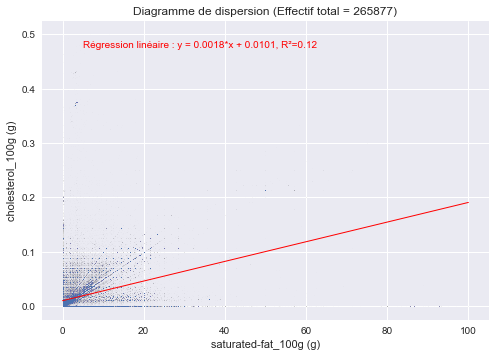

nutriscore_score en fct de saturated-fat_100g :


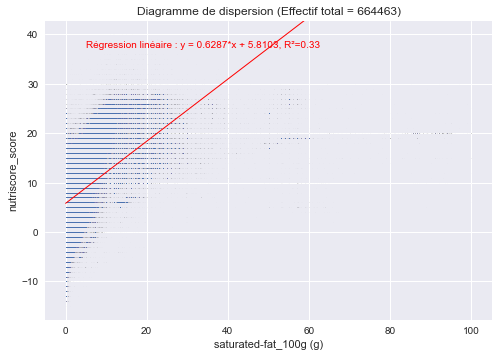

fiber_100g en fct de sodium_100g :


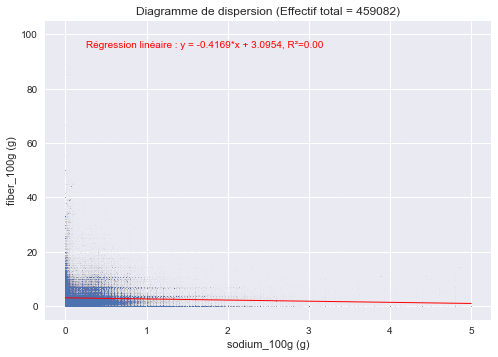

proteins_100g en fct de sodium_100g :


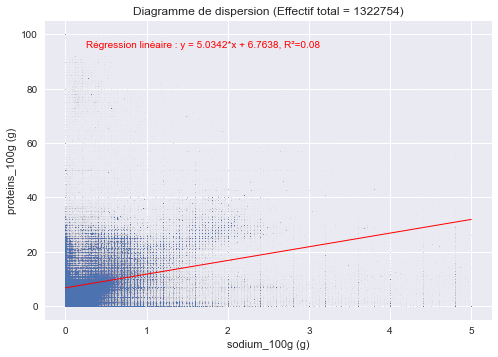

carbohydrates_100g en fct de sodium_100g :


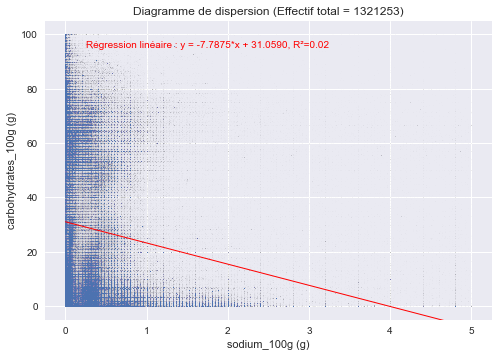

carbohydrates_not_sugars_100g en fct de sodium_100g :


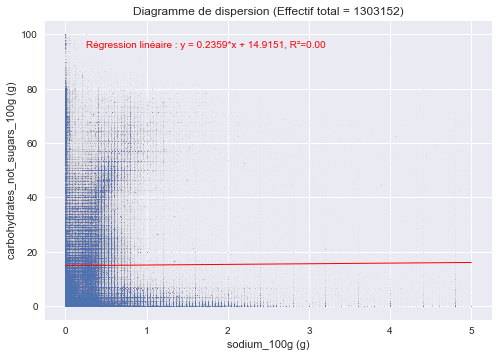

fat_100g en fct de sodium_100g :


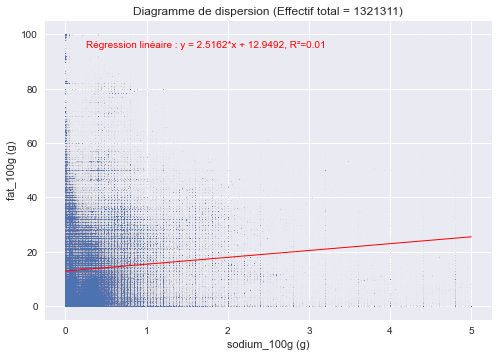

fat_not_saturated_100g en fct de sodium_100g :


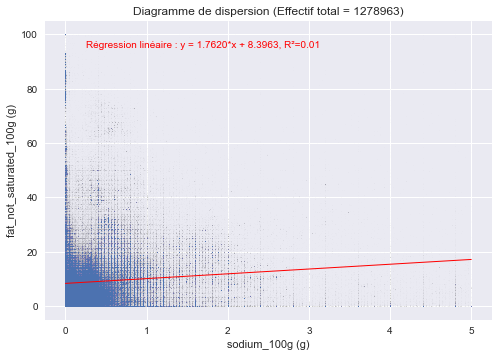

cholesterol_100g en fct de sodium_100g :


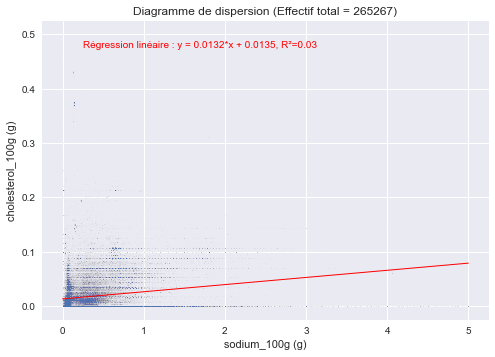

nutriscore_score en fct de sodium_100g :


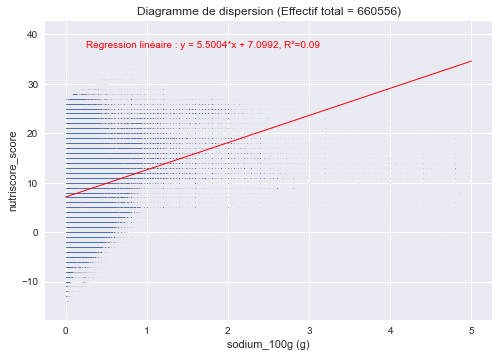

proteins_100g en fct de fiber_100g :


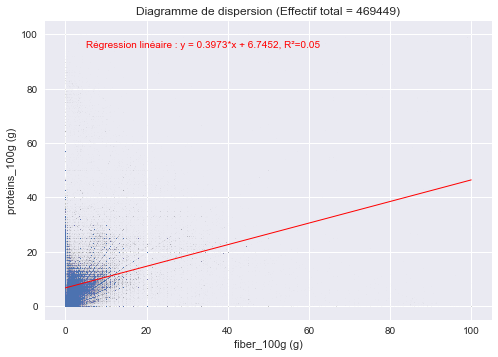

carbohydrates_100g en fct de fiber_100g :


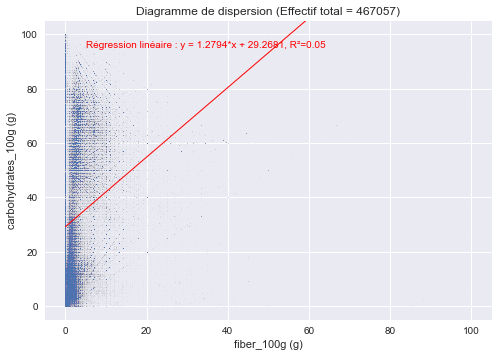

carbohydrates_not_sugars_100g en fct de fiber_100g :


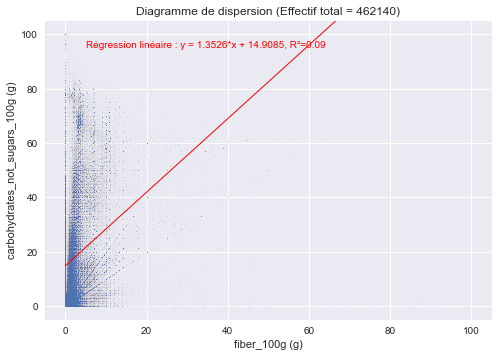

fat_100g en fct de fiber_100g :


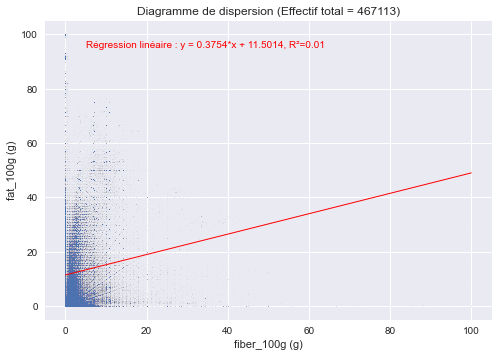

fat_not_saturated_100g en fct de fiber_100g :


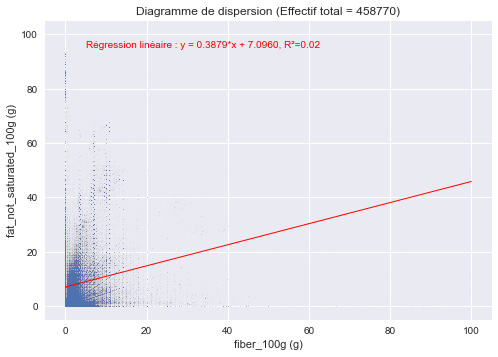

cholesterol_100g en fct de fiber_100g :


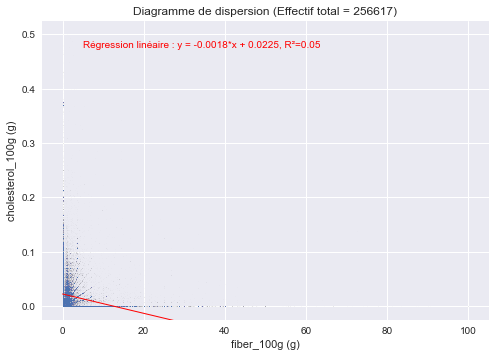

nutriscore_score en fct de fiber_100g :


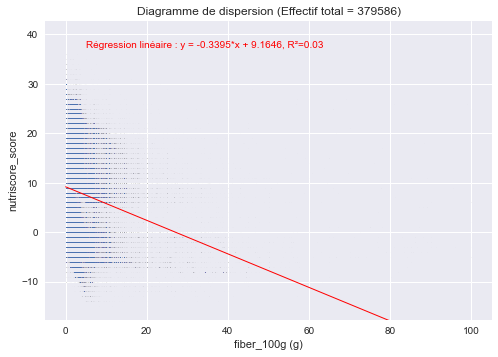

carbohydrates_100g en fct de proteins_100g :


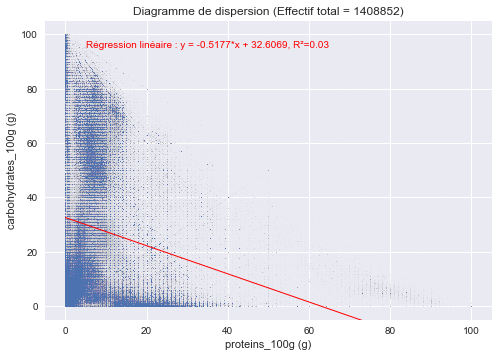

carbohydrates_not_sugars_100g en fct de proteins_100g :


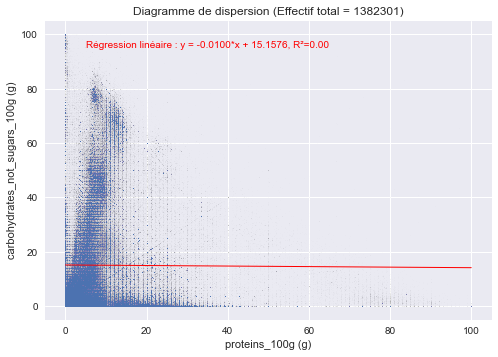

fat_100g en fct de proteins_100g :


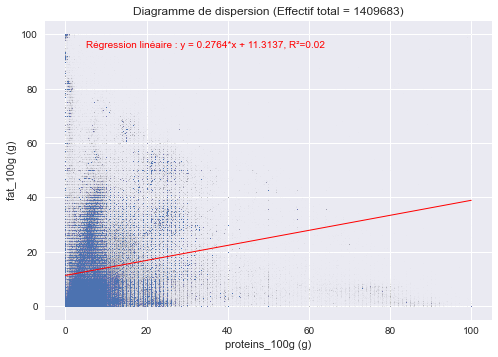

fat_not_saturated_100g en fct de proteins_100g :


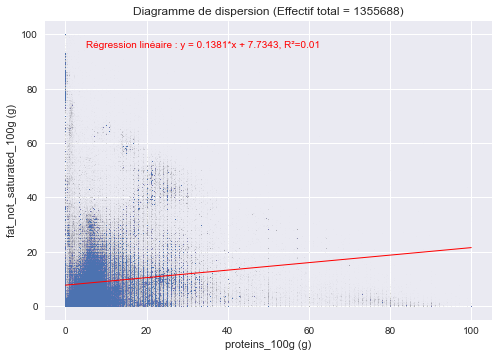

cholesterol_100g en fct de proteins_100g :


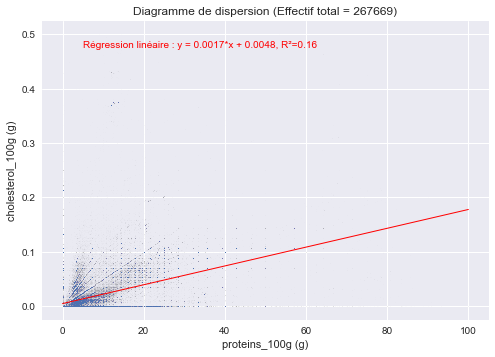

nutriscore_score en fct de proteins_100g :


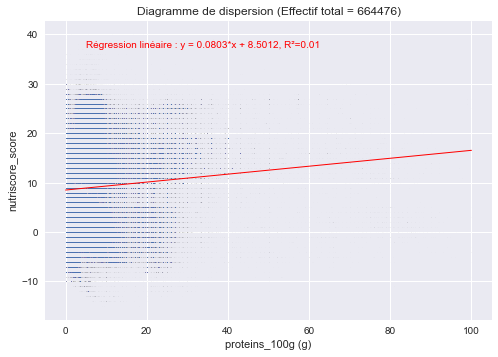

carbohydrates_not_sugars_100g en fct de carbohydrates_100g :


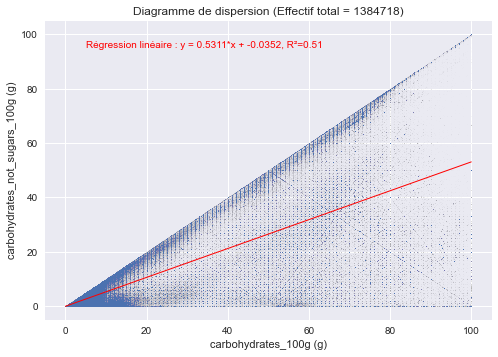

fat_100g en fct de carbohydrates_100g :


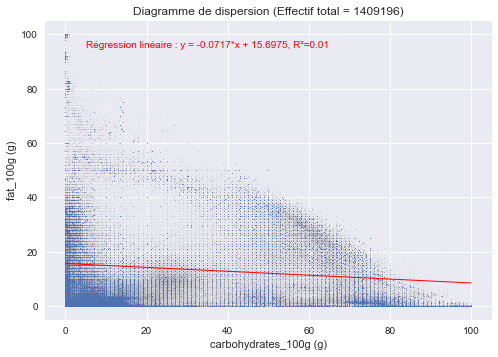

fat_not_saturated_100g en fct de carbohydrates_100g :


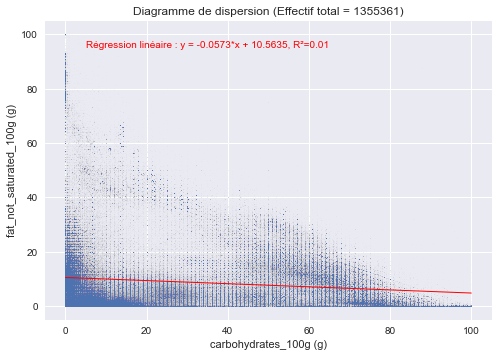

cholesterol_100g en fct de carbohydrates_100g :


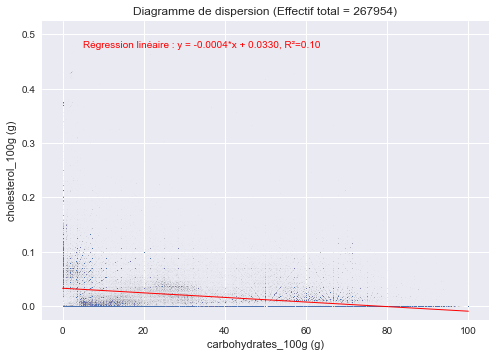

nutriscore_score en fct de carbohydrates_100g :


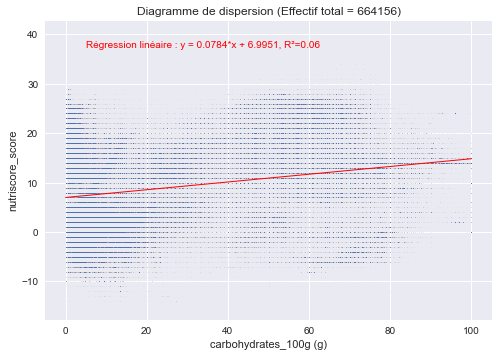

fat_100g en fct de carbohydrates_not_sugars_100g :


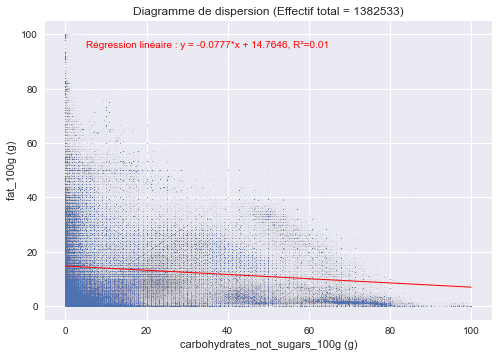

fat_not_saturated_100g en fct de carbohydrates_not_sugars_100g :


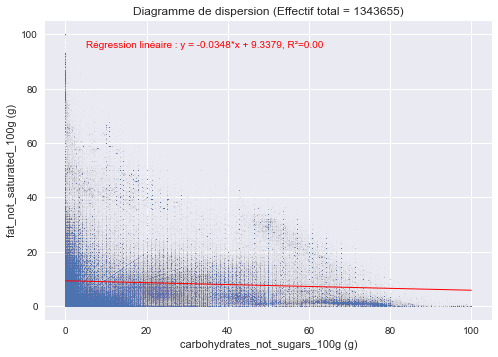

cholesterol_100g en fct de carbohydrates_not_sugars_100g :


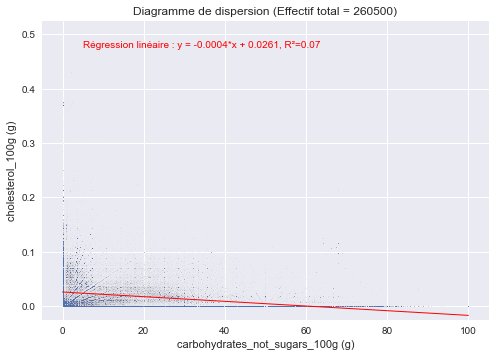

nutriscore_score en fct de carbohydrates_not_sugars_100g :


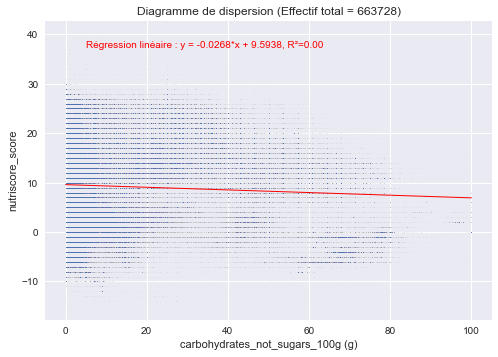

fat_not_saturated_100g en fct de fat_100g :


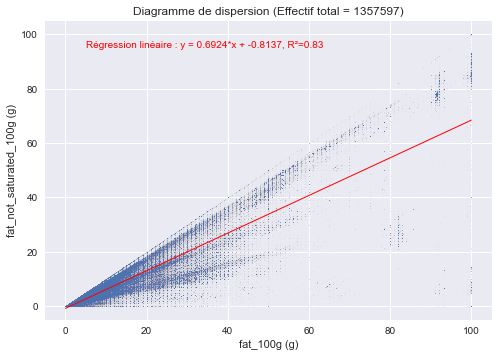

cholesterol_100g en fct de fat_100g :


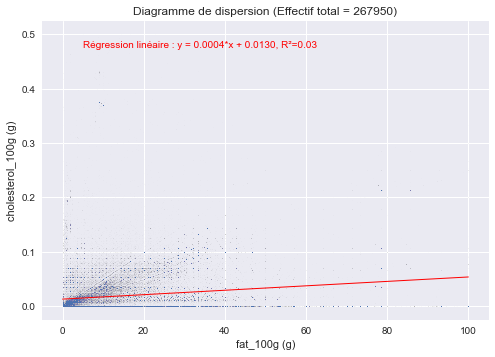

nutriscore_score en fct de fat_100g :


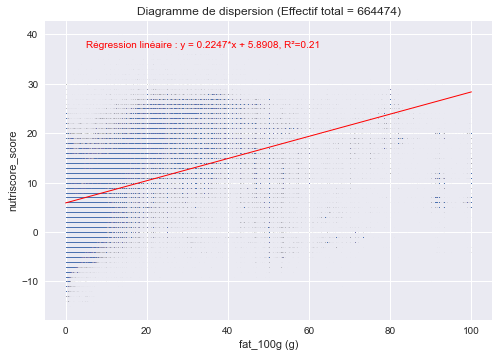

cholesterol_100g en fct de fat_not_saturated_100g :


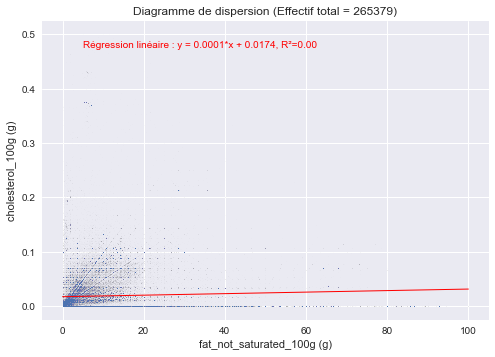

nutriscore_score en fct de fat_not_saturated_100g :


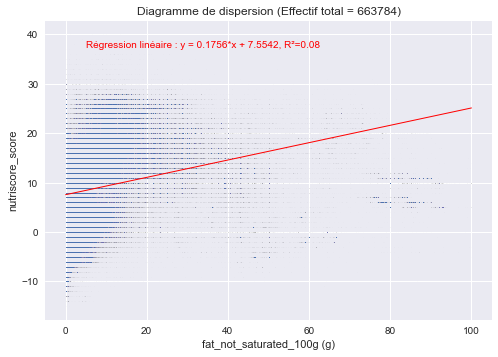

nutriscore_score en fct de cholesterol_100g :


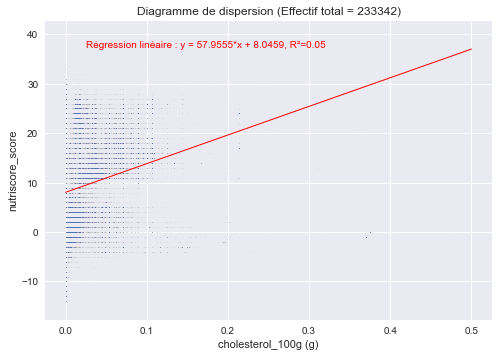

In [242]:
for x in range(0, len(liste_series)):
    for y in range(x+1, len(liste_series)):
        print(
            f"'{liste_series[y][0].name}' en fonction de '{liste_series[x][0].name}' :")
        scatter_plot(liste_series[x][0], liste_series[y][0], min_x=liste_series[x][1],
                     max_x=liste_series[x][2], min_y=liste_series[y][1], max_y=liste_series[y][2],
                    unite_x=liste_series[x][3], unite_y=liste_series[y][3])

## ANOVA sur des couples de variables quantitative et qualitative

### Fonction boites_moustache_multiples()

Retourne un boxplot pour une variable quantitative X, pour chaque modalité de la variable qualitative Y.
Marque la moyenne avec un point rouge.
Affiche la valeur de eta^2 (rapport de corrélation).

Arguments :  
- ser_x : série de la variable quantitative.
- ser_y : série de la variable qualitative.
- min_x : valeur min représentée en abcisse.  
- max_x : valeur max représentée en abcisse.  
- unite_x : string indiquant l'unité de la série en abcisse.  

In [243]:
def boites_moustaches_multiples(ser_x = df1['energy_100g'], ser_y = df1['nutriscore_grade'], min_x=0, max_x=100, unite_x=None) :
    plt.style.use('seaborn')
    
    # listes pour stocker les valeurs issues de chaque classe :
    sers = []     # liste des séries tracées
    labels = []
    moyennes = []
    medianes = []
    variances = []
    effectifs = []

    # traitement du dataframe : données quanlitatives
    ser_y_values = sorted(list(ser_y.dropna().unique()))

    # filtration des valeurs aberrantes de ser_x. On exclue les valeurs à l'extérieur de l'intervalle [min_x, max_x] considérées comme aberrantes.
    largeur = max_x - min_x
    def f_bool_ser_x(x, min, max):
        if np.isnan(x) :
            return False
        elif x < min :
            return False
        elif x > max :
            return False
        else:
            return True
    ser_x_bool = ser_x.apply(lambda x : f_bool_ser_x(x, min_x, max_x))     # vaut True pour les valeurs non aberrantes

    # calcul pour chaque valeur unique de ser_y
    for ser_y_value in ser_y_values :
        ser_y_bool = ser_y.apply(lambda y : y == ser_y_value)
        ser_xy_bool = ser_x_bool & ser_y_bool     # vaut True pour les valeurs non aberrantes de ser_x et lorsque ser_y vaut ser_y_value
        # ser_xy est la série tracée dans un boxplot spécifique à la valeur y
        ser_xy = ser_x[ser_xy_bool]
        moyenne = ser_xy.mean()   
        mediane = ser_xy.median()   
        variance = ser_xy.var()   
        effectif = ser_xy_bool.sum()
        sers.append(ser_xy)
        labels.append(ser_y_value)
        moyennes.append(moyenne)
        medianes.append(mediane)
        variances.append(variance)
        effectifs.append(effectif)

    # calcul de eta² = SCE/SCT
    ser_y_bool = ser_y.apply(lambda y : y in ser_y_values)
    ser_xy_bool = ser_x_bool & ser_y_bool     # vaut True pour les valeurs non aberrantes de ser_x et de ser_y
    total_count = ser_xy_bool.sum()
    # ser_xy compile toutes les valeurs de x pour des lignes ser_x et ser_y non aberrantes
    ser_xy = ser_x[ser_xy_bool]
    moyenne_globale = ser_xy.mean()
    mediane_globale = ser_xy.median()
    # Sum of Squares of the Model / Somme des Carrés Expliqués
    SCE = 0
    for i in range(0,len(moyennes)) :
        SCE += effectifs[i] * (moyennes[i]-moyenne_globale)**2
    # Sum of Squares of the Error / Somme des Carrés Résiduelle
    SCR = 0
    for i in range(0,len(variances)) :
        SCR += effectifs[i]*variances[i]
    # SCT = total sum of squares
    SCT = SCE+SCR        
    eta_2 = SCE/SCT

    # plotting boxplot
    plt.boxplot(sers, vert=0)
    plt.xlim(min_x-0.01*largeur,max_x+0.01*largeur) 
    plt.title(label='ANOVA : '+ser_x.name+' / '+ser_y.name+' (Effectif total : '+str(total_count)+r'). $\eta²$'+' = {0:0.2f}'.format(eta_2))
    y_coordinates = [x for x in range(1,len(labels)+1)]
    plt.yticks(ticks=y_coordinates, labels=labels)
    plt.xlabel(ser_x.name)
    plt.ylabel(ser_y.name)
    label_x = ser_x.name if unite_x is None else ser_x.name+f" ({unite_x})"
    plt.xlabel(label_x)
    # plotting dot "moyenne"
    plt.plot(moyennes, y_coordinates, marker='o', markersize=10, color='red', linewidth=0)  
    # plotting "moyenne_globale"
    plt.axvline(moyenne_globale, color='r', linewidth=0.5)
    plt.axvline(mediane_globale, color='g', linewidth=0.5)
    # show
    plt.show()


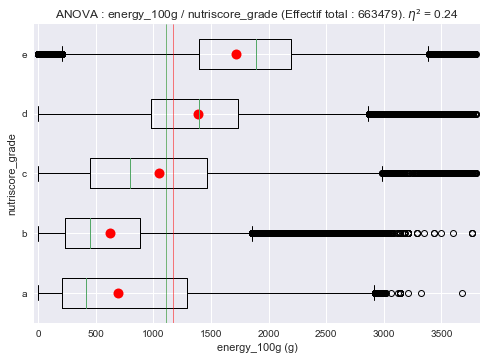

In [246]:
# test unitaire de boites_moustaches_multiples()
boites_moustaches_multiples(ser_x = df1['energy_100g'], ser_y = df1['nutriscore_grade'], min_x=0, max_x=3800, unite_x='g')

### Tracés des boxplots et ANOVAs des variables étudiées

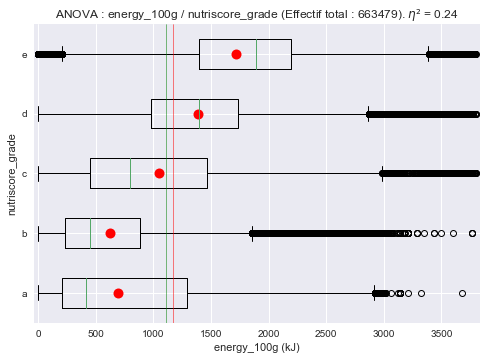

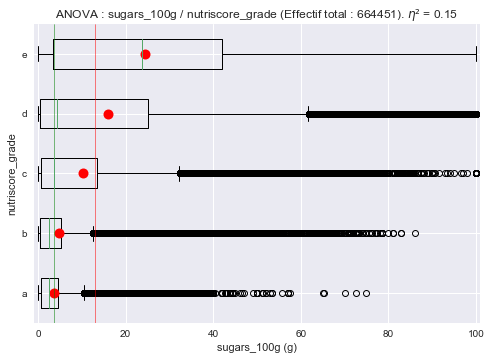

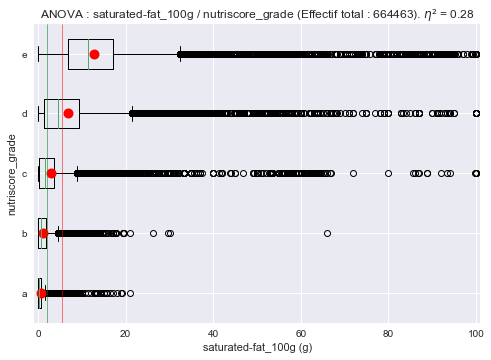

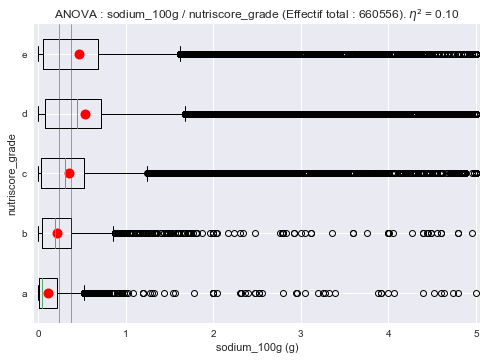

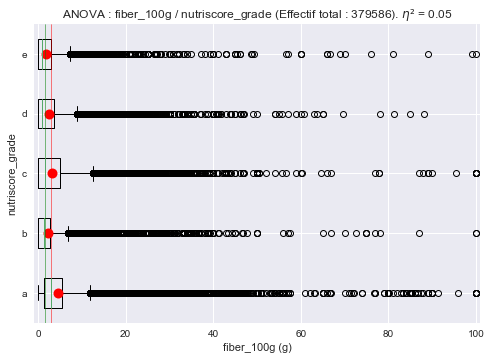

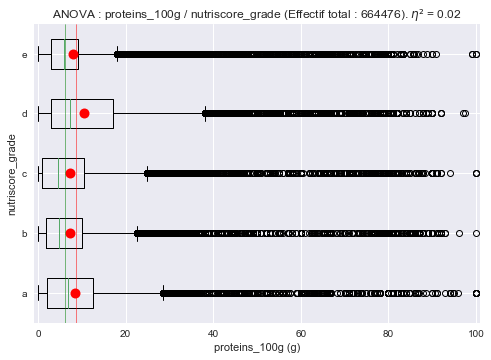

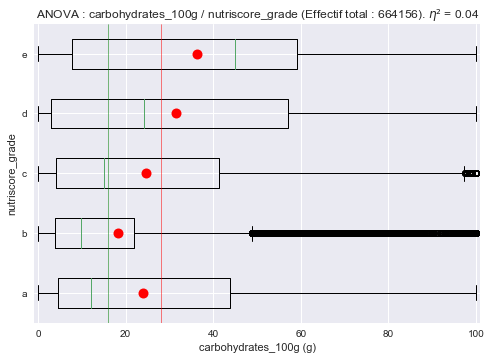

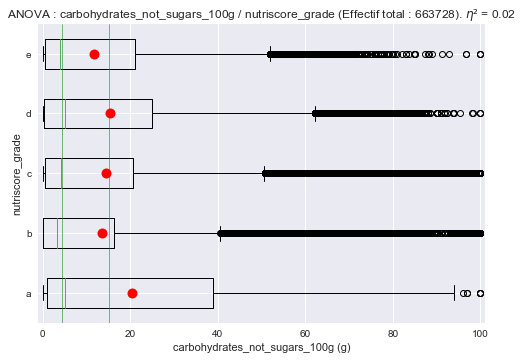

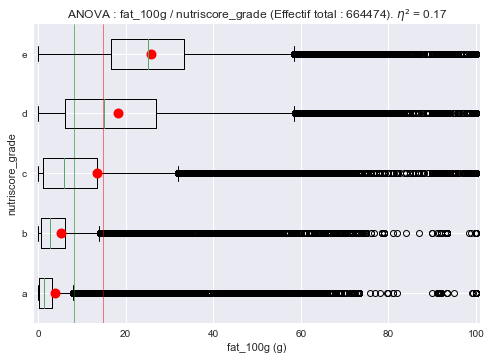

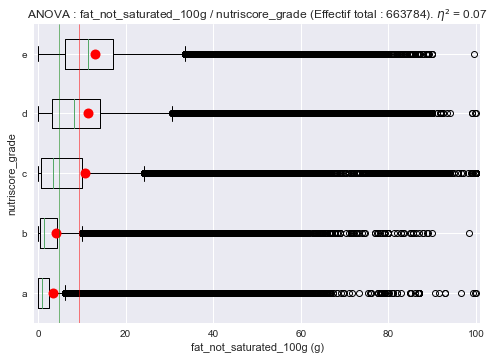

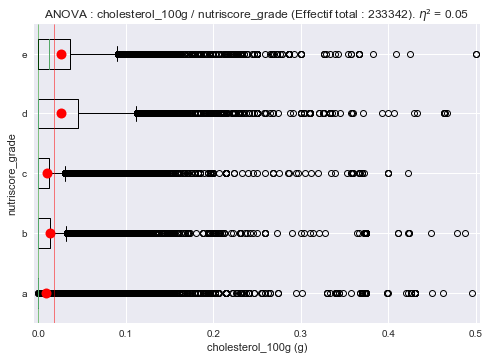

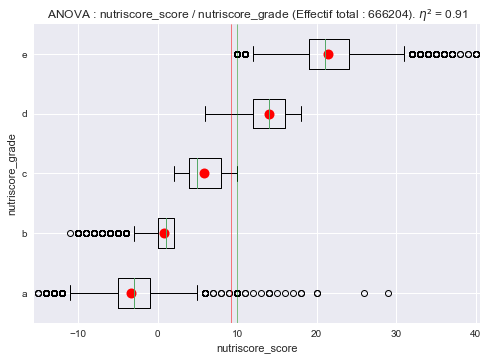

In [248]:
for serie in liste_series :   
    boites_moustaches_multiples(ser_x=serie[0], ser_y=df1['nutriscore_grade'], min_x=serie[1], max_x=serie[2], unite_x=serie[3])

## Récupérer les données de produits vendus en France

### Analyse des colonnes qui donnent le lieu de vente d'un produit

In [96]:
df1['countries']

0             France
1             France
2              en:es
3              en:es
4             France
             ...    
1789543        en:re
1789544    en:france
1789545        en:be
1789546    en:france
1789547       France
Name: countries, Length: 1789548, dtype: object

In [97]:
df1['countries_tags']

0           en:france
1           en:france
2            en:spain
3            en:spain
4           en:france
              ...    
1789543    en:reunion
1789544     en:france
1789545    en:belgium
1789546     en:france
1789547     en:france
Name: countries_tags, Length: 1789548, dtype: object

In [98]:
df1['countries_en']

0           France
1           France
2            Spain
3            Spain
4           France
            ...   
1789543    Réunion
1789544     France
1789545    Belgium
1789546     France
1789547     France
Name: countries_en, Length: 1789548, dtype: object

In [99]:
df1['states_en'][1111111]

'To be completed,Nutrition facts completed,Ingredients completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Origins to be completed,Categories to be completed,Brands to be completed,Packaging to be completed,Quantity to be completed,Product name completed,Photos to be validated,Packaging photo to be selected,Nutrition photo to be selected,Ingredients photo to be selected,Front photo to be selected,Photos uploaded'

In [141]:
ser = df1['countries'].value_counts()
ser.head(10)

France           430090
United States    310081
en:fr            178531
en:es             99870
en:france         71327
España            69503
en:it             62238
en:be             29632
en:FR             26726
en:ch             22714
Name: countries, dtype: int64

In [101]:
ser.tail(10)

France, Switzerland, en:spain, en:belgium          1
Allemagne,France,Belgique,Espagne                  1
Portugal,Deutschland                               1
fr:Espagne                                         1
Saint-Pierre-et-Miquelon,Canada                    1
Allemagne,Irlande,en:switzerland,Suisse            1
Australien,Vereinigtes Königreich,en:australia     1
France, Royaume-Uni, Switzerland, United States    1
France,en:Allemagne,en:Belgique,en:Suisse          1
Spain,Bélgica,Francia,Suiza                        1
Name: countries, dtype: int64

In [142]:
ser = df1['countries_tags'].value_counts()
ser.head(10)

en:france               730158
en:united-states        346756
en:spain                201012
en:italy                 74678
en:germany               62758
en:belgium               48927
en:switzerland           47008
en:united-kingdom        41059
en:canada                28974
en:france,en:germany     11822
Name: countries_tags, dtype: int64

In [103]:
ser.tail(10)

en:argentina,en:bolivia,en:chile,en:colombia,en:ecuador,en:mexico,en:paraguay,en:peru,en:spain,en:uruguay    1
en:cameroon,en:central-african-republic,en:chad,en:equatorial-guinea,en:gabon,en:republic-of-the-congo       1
en:bosnia-and-herzegovina,en:croatia,en:hungary,en:montenegro,en:poland                                      1
en:france,en:philippines,en:reunion                                                                          1
en:china,en:germany,en:spain                                                                                 1
en:egypt,en:united-states                                                                                    1
en:ghana,en:singapore                                                                                        1
en:france,en:germany,en:hungary,en:spain,en:switzerland                                                      1
en:austria,en:france,en:germany,en:taiwan                                                                    1
e

In [143]:
ser = df1['countries_en'].value_counts()
ser.head(10)

France            730158
United States     346756
Spain             201012
Italy              74678
Germany            62758
Belgium            48927
Switzerland        47008
United Kingdom     41059
Canada             28974
France,Germany     11822
Name: countries_en, dtype: int64

In [105]:
ser.tail(10)

Namibia,South Africa                                            1
Belgium,Poland,Romania                                          1
Bulgaria,Cyprus,France,Germany,Italy,Poland                     1
France,Germany,Russia,Spain,United Kingdom                      1
Cook Islands,France,French Polynesia,New Caledonia              1
Australia,France,Ireland,United Kingdom                         1
Belgium,France,French Polynesia,Guadeloupe,Italy,Switzerland    1
France,Germany,Réunion,Switzerland                              1
Bulgaria,Czech Republic,Romania,Serbia                          1
Czech Republic,France,Italy                                     1
Name: countries_en, dtype: int64

Les variables 'countries_en' et 'countries_tags' renseignent les mêmes données. De plus les données sont similaires (noms des pays en anglais). La variable 'country' est plus difficilement exploitable, car les noms de pays sont indiqués en différentes langues.

=> on retient la variable 'countries_en' pour extraire les données relatives à la France

### Extraction des produits vendus en France

In [106]:
df1_France = df1.copy()
ser = df1_France['countries_en'].copy()
ser = ser.apply(lambda x : str(x).find('France')!=-1)   # ser est une série de booléens indiquant si df1 contient 'France'
df1_France = df1_France[ser]

In [135]:
with pd.option_context('display.max_rows', 400, 'display.max_colwidth', 1000):
    display(df1_France.head())

code  \
0         0000000000017   
1         0000000000031   
4         0000000000100   
5  00000000001111111111   
6         0000000000123   

                                                                                                url  \
0                          http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers   
1                                     http://world-en.openfoodfacts.org/product/0000000000031/cacao   
4  http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille   
5                       http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt   
6                      http://world-en.openfoodfacts.org/product/0000000000123/sauce-sweety-chili-0   

                      creator   created_t      created_datetime  \
0                     kiliweb  1529059080  2018-06-15T10:38:00Z   
1                    isagoofy  1539464774  2018-10-13T21:06:14Z   
4                       del51  1444572561  2015-10-11T14:09:21Z   
5  openfoodfacts-contributors  1560020173  2019-06-08T18:56:13Z   
6                     kiliweb  1535737982  2018-08-31T17:53:02Z   

   last_modified_t last_modified_datetime                  product_name  \
0       1561463718   2019-06-25T11:55:18Z              Vitória crackers   
1       1539464817   2018-10-13T21:06:57Z                         Cacao   
4       1444659212   2015-10-12T14:13:32Z   moutarde au moût de raisin    
5       1560020173   2019-06-08T18:56:13Z                       Sfiudwx   
6       1535737986   2018-08-31T17:53:06Z         Sauce Sweety chili 0%   

  abbreviated_product_name generic_name quantity packaging packaging_tags  \
0                      NaN          NaN      NaN       NaN            NaN   
1                      NaN          NaN    130 g       NaN            NaN   
4                      NaN          NaN     100g       NaN            NaN   
5                      NaN          NaN    dgesc       NaN            NaN   
6                      NaN          NaN      NaN       NaN            NaN   

  packaging_text         brands    brands_tags  \
0            NaN            NaN            NaN   
1            NaN            NaN            NaN   
4            NaN  courte paille  courte-paille   
5            NaN           Watt           watt   
6            NaN            NaN            NaN   

                                categories  \
0                                      NaN   
1                                      NaN   
4  Epicerie, Condiments, Sauces, Moutardes   
5                                      Xsf   
6                                      NaN   

                                    categories_tags  \
0                                               NaN   
1                                               NaN   
4  en:groceries,en:condiments,en:sauces,en:mustards   
5                                            fr:xsf   
6                                               NaN   

                          categories_en origins origins_tags origins_en  \
0                                   NaN     NaN          NaN        NaN   
1                                   NaN     NaN          NaN        NaN   
4  Groceries,Condiments,Sauces,Mustards     NaN          NaN        NaN   
5                                fr:xsf     NaN          NaN        NaN   
6                                   NaN     NaN          NaN        NaN   

  manufacturing_places manufacturing_places_tags         labels  \
0                  NaN                       NaN            NaN   
1                  NaN                       NaN            NaN   
4                  NaN                       NaN  Delois france   
5                  NaN                       NaN            NaN   
6                  NaN                       NaN            NaN   

        labels_tags         labels_en emb_codes emb_codes_tags  \
0               NaN               NaN       NaN            NaN   
1               NaN      

Les produits sont souvent déclarés 'countries_en' == 'France' alors que c'est totalement faux. En particulier, pour les produits renseignés par Yuca (creator:kiliweb)

## Récupérer les données des produits sans gluten

In [13]:
ser = df1['labels_tags']
for i in range (10):
    print(f"{i} : {ser.get(i)}")

0 : nan
1 : nan
2 : nan
3 : nan
4 : fr:delois-france
5 : nan
6 : nan
7 : nan
8 : nan
9 : nan


In [14]:
df1_glutenfree = df1.copy()
ser = df1_glutenfree['labels_tags'].copy()
ser = ser.apply(lambda x : str(x).find('gluten-free')!=-1 or str(x).find('no-gluten')!=-1)   # ser est une série de booléens indiquant si df1 contient les strings recherchés
df1_glutenfree = df1_glutenfree[ser]

In [70]:
print("Nb de lignes de df1_glutenfree : ", len(df1_glutenfree))

Nb de lignes de df1_glutenfree :  56505


In [16]:
with pd.option_context('display.max_rows', 400, 'display.max_colwidth', 1000):
    display(df1_glutenfree.head())

code  \
453  0000010206515   
751       00000956   
761  0000101209159   
840  0000171812457   
850     0000185520   

                                                                                                                   url  \
453                                  http://world-en.openfoodfacts.org/product/0000010206515/pate-a-sucre-alice-delice   
751                                       http://world-en.openfoodfacts.org/product/00000956/cana-lomo-bellota-iberica   
761  http://world-en.openfoodfacts.org/product/0000101209159/veritable-pate-a-tartiner-noisettes-chocolat-noir-bovetti   
840                                 http://world-en.openfoodfacts.org/product/0000171812457/glaces-vegetales-des-alpes   
850                                                         http://world-en.openfoodfacts.org/product/0000185520/jamon   

     creator   created_t      created_datetime  last_modified_t  \
453  kiliweb  1511122551  2017-11-19T20:15:51Z       1511124271   
751  kiliweb  1577784740  2019-12-31T09:32:20Z       1577785503   
761  kiliweb  1519297017  2018-02-22T10:56:57Z       1579375591   
840  kiliweb  1525177385  2018-05-01T12:23:05Z       1566592567   
850  kiliweb  1576793135  2019-12-19T22:05:35Z       1576793830   

    last_modified_datetime                                       product_name  \
453   2017-11-19T20:44:31Z                                       Pâte à Sucre   
751   2019-12-31T09:45:03Z                          Caña lomo bellota ibérica   
761   2020-01-18T19:26:31Z  Véritable pâte à tartiner noisettes chocolat noir   
840   2019-08-23T20:36:07Z                         Glaces vegetales des alpes   
850   2019-12-19T22:17:10Z                                              Jamon   

    abbreviated_product_name            generic_name quantity  \
453                      NaN  Pâte à Sucre - Fondant    250 g   
751                      NaN                     NaN      NaN   
761                      NaN                     NaN    350 g   
840                      NaN                     NaN      NaN   
850                      NaN                     NaN      NaN   

            packaging    packaging_tags packaging_text        brands  \
453  sachet,plastique  sachet,plastique            NaN  Alice Délice   
751               NaN               NaN            NaN           NaN   
761               NaN               NaN            NaN       Bovetti   
840               NaN               NaN            NaN           NaN   
850               NaN               NaN            NaN           NaN   

      brands_tags  \
453  alice-delice   
751           NaN   
761       bovetti   
840           NaN   
850           NaN   

                                                                                                                                                                                       categories  \
453                                                                                       Snacks, Snacks sucrés, Confiseries, Aides culinaires, Aides à la pâtisserie, Pâtes à sucre, Décorations   
751                                                                                                                                                                                           NaN   
761  Produits à tartiner, Petit-déjeuners, Produits à tartiner sucrés, Pâtes à tartiner, Pâtes à tartiner aux noisettes, Pâtes à tartiner au chocolat, Pâtes à tartiner aux noisettes et au cacao   
840                                                                                                                                                                                           NaN   
850                                                                                                                                                                                           NaN   

                                                                                                                           c

## Récupérer le numéro de ligne du dataset à partir d'un code-barres

In [207]:
def ligne_dataset(barcode):
    # recherche de la ligne correspondant au code-barres
    df1_barcode = df1.copy()
    df1_barcode = df1_barcode[df1_barcode['code'] == barcode]
    return df1_barcode

In [208]:
# Test de la fonction ligne_dataset()
barcode = '0000000000100'
ligne_dataset(barcode)

code                                                url creator  \
4  0000000000100  http://world-en.openfoodfacts.org/product/0000...   del51   

    created_t      created_datetime  last_modified_t last_modified_datetime  \
4  1444572561  2015-10-11T14:09:21Z       1444659212   2015-10-12T14:13:32Z   

                   product_name abbreviated_product_name generic_name  \
4   moutarde au moût de raisin                       NaN          NaN   

  quantity packaging packaging_tags packaging_text         brands  \
4     100g       NaN            NaN            NaN  courte paille   

     brands_tags                               categories  \
4  courte-paille  Epicerie, Condiments, Sauces, Moutardes   

                                    categories_tags  \
4  en:groceries,en:condiments,en:sauces,en:mustards   

                          categories_en origins origins_tags origins_en  \
4  Groceries,Condiments,Sauces,Mustards     NaN          NaN        NaN   

  manufacturing_places manufacturing_places_tags         labels  \
4                  NaN                       NaN  Delois france   

        labels_tags         labels_en emb_codes emb_codes_tags  \
4  fr:delois-france  fr:delois-france       NaN            NaN   

  first_packaging_code_geo  cities cities_tags purchase_places         stores  \
4                      NaN     NaN         NaN             NaN  courte paille   

  countries countries_tags countries_en  \
4    France      en:france       France   

                                    ingredients_text   allergens  \
4  eau graines de téguments de moutarde vinaigre ...  en:mustard   

   allergens_en traces traces_tags traces_en serving_size  serving_quantity  \
4           NaN    NaN         NaN       NaN          NaN               NaN   

   no_nutriments  additives_n additives additives_tags additives_en  \
4            NaN          0.0       NaN            NaN          NaN   

   ingredients_from_palm_oil_n  ingredients_from_palm_oil  \
4                          0.0                        NaN   

  ingredients_from_palm_oil_tags  ingredients_that_may_be_from_palm_oil_n  \
4                            NaN                                      0.0   

   ingredients_that_may_be_from_palm_oil  \
4                                    NaN   

  ingredients_that_may_be_from_palm_oil_tags  nutriscore_score  \
4                                        NaN              18.0   

  nutriscore_grade  nova_group   pnns_groups_1         pnns_groups_2  \
4                d         NaN  Fat and sauces  Dressings and sauces   

                                              states  \
4  en:to-be-completed, en:nutrition-facts-complet...   

                                         states_tags  \
4  en:to-be-completed,en:nutrition-facts-complete...   

                                           states_en brand_owner  \
4  To be completed,Nutrition facts completed,Ingr...         NaN   

   ecoscore_score_fr ecoscore_grade_fr main_category main_category_en  \
4               60.0                 b   en:mustards         Mustards   

                                           image_url  \
4  https://static.openfoodfacts.org/images/produc...   

                                     image_small_url image_ingredients_url  \
4  https://static.openfoodfacts.org/images/produc...                   NaN   

  image_ingredients_small_url image_nutrition_url image_nutrition_small_url  \
4                         NaN                 NaN                       NaN   

   energy-kj_100g  energy-kcal_100g  energy_100g  energy-from-fat_100g  \
4           936.0               NaN        936.0                   NaN   

   fat_100g  saturated-fat_100g  -butyric-acid_100g  -caproic-acid_100g  \
4       8.2                 2.2                 NaN                 NaN   

   -caprylic-acid_100g  -capric-acid_100g  -lauric-acid_100g  \
4                  NaN                NaN                NaN   

   -myristic-acid_100g  -palmitic-acid_100g  -stearic

# Application Régimescore

## Bibliographie succinte sur les régimes médicaux

Liste non exhaustive de régimes médicaux :  
    https://www.doctissimo.fr/html/nutrition/pour_tous/nu_169_regimes_medic.htm  
    https://vitadiet.net/regime.html 

Données openfoodfacts pertinentes pour l'élaboration de régimes :  
    - régime sans sel : pas de sel  
    - régime sans fibres : moins de fibres  
    - régime anti-cholestérol : moins de cholestérol  
    - régime sans fer (hémochromatose) : pas de fer  
    - régime sans lactose : pas de lactose
    - régime diabétique : moins de sucre, moins de gras  
    - régime hypoprotidique pour insufisance rénale : pas de sel, moins de protéines  
    - régime hypotriglycéridémiant : moins de gras saturés, moins de sucres, moins d'alcool  
    - corticothérapie : accompagnée d'un régime pauvre en sel et en sucre  
Liste non exhaustive.

## Mise en oeuvre concrète du Régimescore pour 3 cas particuliers

### Méthode de calcul du score du Régimescore et de la note du Régimescore

Pour les variables déjà présentes dans le Nutriscore (variables défavorables seulement), on reprend la méthode de calcul du score Nutriscore (sans faire les arrondis du Nutriscore), puis on fait la somme des points pour les scores des variables, puis on divise par le nb de variables.  

Pour les variables non présentes dans le Nutriscore, les scores ont été créés de toute pièce.

Par analogie avec le Nutriscore, le score du Régimescore permettra de donner une note finale : A, B, C, D ou E.  
A si score < 2 points.
B si score < 4 points.
C si score < 6 points.
D si score < 8 points.
E sinon.

Exemple : pour un régime sans gras et sans sel, un produit qui a 3.4 points de gras et 5.4 points de sels aura un score final de (3.4+5.4)/2 = 4.4 pts, ce qui lui fait une note de C.

NB : les seuils utilisés n'ont aucune réalité médicale. Ils ont pour unique but de servir à la réalisation d'une version "preuve de concept" de l'appli Régimescore.  

### Fonction score_variable()

Retourne le score pour une variable et une teneur données.  
  
Arguments :  
- variable : string du nom de la variable (exemple : 'salt_100g')  
- teneur : valeur (en g dans 100g)  

In [256]:
def score_variable(variable, teneur):      
    if np.isnan(teneur):
        return np.nan
    if variable == 'salt_100g':
        assert teneur <= 100, f"La teneur en {variable} doit être inférieure ou égale à 100."
        return teneur/(0.090*2.5) if teneur < 0.900*2.5 else 10
    elif variable == 'saturated-fat_100g':
        assert teneur <= 100, f"La teneur en {variable} doit être inférieure ou égale à 100."
        return teneur if teneur < 10 else 10
    elif variable == 'fat_100g':
        assert teneur <= 100, f"La teneur en {variable} doit être inférieure ou égale à 100."
        return teneur/6 if teneur < 60 else 10
    elif variable == 'energy_100g':
        assert teneur <= 3800, f"La teneur en {variable} doit être inférieure ou égale à 3800."
        return teneur/335 if teneur < 3350 else 10
    elif variable == 'sugars_100g':
        assert teneur <= 100, f"La teneur en {variable} doit être inférieure ou égale à 100."
        return teneur/4.5 if teneur < 45 else 10
    elif variable == 'cholesterol_100g':
        assert teneur <= 5, f"La teneur en {variable} doit être inférieure ou égale à 5."
        return teneur/0.01 if teneur < 0.1 else 10
    elif variable == '-lactose_100g':
        assert teneur <= 100, f"La teneur en {variable} doit être inférieure ou égale à 5."
        return teneur/0.1 if teneur < 1 else 10
    raise ValueError(f"La variable '{variable}' est inconnue.")

In [92]:
# Test de la fonction score_variable()
print(score_variable('salt_100g', 0.4))
print(score_variable('saturated-fat_100g', 9.9))
print(score_variable('energy_100g', 990))
print(score_variable('sugars_100g', 9.9))

1.7777777777777781
9.9
2.955223880597015
2.2


### Fonction note_regimescore()

Retourne la note (A, B, C, D, E) pour une liste de variables et de teneurs associées à un produit.
  
Arguments :  
- liste_variables : liste de tuples (variable,teneur) associées à un produit.

In [364]:
def note_regimescore(liste_variables_teneurs):
    assert len(liste_variables_teneurs) != 0, f"liste_variables_teneurs est vide"
    somme_score = 0
    for tupl in liste_variables_teneurs:
        somme_score += score_variable(tupl[0], tupl[1])
    score = somme_score/len(liste_variables_teneurs)
    if np.isnan(score):
        return np.nan
    elif score < 1:
        return 'A'
    elif score < 2.5:
        return 'B'
    elif score < 4:
        return 'C'
    elif score < 6:
        return 'D'
    else : 
        return 'E'
    

In [94]:
# Test de la fonction note_regimescore()
liste_variables_teneurs = [('salt_100g', 0.4), ('saturated-fat_100g', 9.9), ('sugars_100g', 9.9)]
note_regimescore(liste_variables_teneurs)

'C'

### Fonction regimescore()

Retourne la note (A, B, C, D, E) pour une liste de variables du régime et une ligne du tableau.
  
Arguments :  
- liste_variables : liste des variables du régime.
- index_df1 : index (ligne) dans le df1.

In [287]:
def regimescore(liste_variables, index_df1, print_teneurs=True):
    if print_teneurs :
        print("Product name : ", df1['product_name'][index_df1])
    # construction de liste_variables_teneurs
    liste_variables_teneurs = []
    for variable in liste_variables:
        teneur = df1[variable][index_df1]
        tupl = (variable, teneur)
        liste_variables_teneurs.append(tupl)
        if print_teneurs :
            print(variable, " = ", teneur)
    note = note_regimescore(liste_variables_teneurs)
    if print_teneurs :
        print("Régimescore : ", note)
    else:
        return note

In [288]:
# Test de la fonction note_regimescore()
liste_variables = ['salt_100g', 'saturated-fat_100g', 'sugars_100g']
index_df1 = 4
regimescore(liste_variables, index_df1)

Product name :   moutarde au moût de raisin 
salt_100g  =  4.6
saturated-fat_100g  =  2.2
sugars_100g  =  22.0
Régimescore :  C


### Régimes à 1 variable

##### Régime sans sel

In [97]:
regimescore(['salt_100g'], 4)

Product name :   moutarde au moût de raisin 
salt_100g  =  4.6
Régimescore :  E


##### Régime sans cholestérol

In [98]:
regimescore(['cholesterol_100g'], 4)

Product name :   moutarde au moût de raisin 
cholesterol_100g  =  nan
Régimescore :  nan


In [99]:
regimescore(['cholesterol_100g'], 11111)

Product name :  Fat free thousand island dressing
cholesterol_100g  =  0.0
Régimescore :  A


##### Régime sans lactose

In [249]:
regimescore(['-lactose_100g'], 4)

Product name :   moutarde au moût de raisin 
-lactose_100g  =  nan
Régimescore :  nan


In [257]:
regimescore(['-lactose_100g'], 1779645)

Product name :  Double Shot Iced Coffee
-lactose_100g  =  20.5
Régimescore :  E


### Régime à 2 variables

##### Régime diabétique (sans sucre, sans gras)

In [100]:
regimescore(['sugars_100g', 'fat_100g'], 4)

Product name :   moutarde au moût de raisin 
sugars_100g  =  22.0
fat_100g  =  8.2
Régimescore :  B


### Régime à 3 variables

##### Régime diabétique + corticothérapie (sans sucre, sans gras, sans sel)

In [101]:
regimescore(['sugars_100g', 'fat_100g', 'salt_100g'], 4)

Product name :   moutarde au moût de raisin 
sugars_100g  =  22.0
fat_100g  =  8.2
salt_100g  =  4.6
Régimescore :  C


## Faisabilité d'autres Régimescores avec la base de données openfoodfacts

https://fr.wikipedia.org/wiki/Table_de_Burt

### Table de Burt pour régimes à 1 et 2 variables

In [266]:
liste_variables_pour_regime_2D = [
    'energy_100g',
    'sugars_100g',
    'saturated-fat_100g',
    'sodium_100g',
    'fiber_100g',
    'proteins_100g',
    'carbohydrates_100g',
    'fat_100g',
    'cholesterol_100g',
    'iron_100g',
    '-lactose_100g',
    'nutriscore_score']

In [267]:
df_Burt = pd.DataFrame(columns = liste_variables_pour_regime_2D, index = liste_variables_pour_regime_2D)
for x in range(len(liste_variables_pour_regime_2D)):
    for y in range(x+1):
        if x == y :
            compte = df1[liste_variables_pour_regime_2D[x]].notnull().sum()
        else : 
            ser_x = df1[liste_variables_pour_regime_2D[x]].copy().notnull()     # valeurs non null en colonne X
            ser_y = df1[liste_variables_pour_regime_2D[y]].copy().notnull()            
            ser_x_inter_y = ser_x & ser_y
            compte = ser_x_inter_y.sum()
        # écriture dans la table de Burt
        df_Burt.loc[liste_variables_pour_regime_2D[x], liste_variables_pour_regime_2D[y]] = compte
        df_Burt.loc[liste_variables_pour_regime_2D[y], liste_variables_pour_regime_2D[x]] = compte
print("Table de Burt :")
display(df_Burt)

Table de Burt :


energy_100g sugars_100g saturated-fat_100g sodium_100g  \
energy_100g            1415767     1381378            1355006     1334848   
sugars_100g            1381378     1395414            1354898     1320661   
saturated-fat_100g     1355006     1354898            1369589     1295271   
sodium_100g            1334848     1320661            1295271     1359672   
fiber_100g              467428      466053             462076      463444   
proteins_100g          1404694     1386968            1359376     1338457   
carbohydrates_100g     1403356     1385788            1356715     1336970   
fat_100g               1403128     1385133            1358592     1337021   
cholesterol_100g        267339      261135             265957      267667   
iron_100g               263396      260538             259583      263317   
-lactose_100g              767         733                733         741   
nutriscore_score        663479      664451             664463      664758   

                   fiber_100g proteins_100g carbohydrates_100g fat_100g  \
energy_100g            467428       1404694            1403356  1403128   
sugars_100g            466053       1386968            1385788  1385133   
saturated-fat_100g     462076       1359376            1356715  1358592   
sodium_100g            463444       1338457            1336970  1337021   
fiber_100g             470454        469449             467057   467113   
proteins_100g          469449       1413938            1408852  1409683   
carbohydrates_100g     467057       1408852            1412352  1409196   
fat_100g               467113       1409683            1409196  1412866   
cholesterol_100g       256690        267754             268036   268035   
iron_100g              257632        263769             263884   263935   
-lactose_100g             371           768                766      767   
nutriscore_score       379586        664476             664156   664474   

                   cholesterol_100g iron_100g -lactose_100g nutriscore_score  
energy_100g                  267339    263396           767           663479  
sugars_100g                  261135    260538           733           664451  
saturated-fat_100g           265957    259583           733           664463  
sodium_100g                  267667    263317           741           664758  
fiber_100g                   256690    257632           371           379586  
proteins_100g                267754    263769           768           664476  
carbohydrates_100g           268036    263884           766           664156  
fat_100g                     268035    263935           767           664474  
cholesterol_100g             268199    254166            63           233392  
iron_100g                    254166    264212            75           230973  
-lactose_100g                    63        75           775              627  
nutriscore_score             233392    230973           627           666204

In [268]:
lignes = len(df1)
df_Burt = df_Burt.applymap(lambda x : int(x/lignes*100))
print("Table de Burt standardisée (%):")
display(df_Burt)

Table de Burt standardisée (%):


energy_100g  sugars_100g  saturated-fat_100g  sodium_100g  \
energy_100g                  79           77                  75           74   
sugars_100g                  77           77                  75           73   
saturated-fat_100g           75           75                  76           72   
sodium_100g                  74           73                  72           75   
fiber_100g                   26           26                  25           25   
proteins_100g                78           77                  75           74   
carbohydrates_100g           78           77                  75           74   
fat_100g                     78           77                  75           74   
cholesterol_100g             14           14                  14           14   
iron_100g                    14           14                  14           14   
-lactose_100g                 0            0                   0            0   
nutriscore_score             37           37                  37           37   

                    fiber_100g  proteins_100g  carbohydrates_100g  fat_100g  \
energy_100g                 26             78                  78        78   
sugars_100g                 26             77                  77        77   
saturated-fat_100g          25             75                  75        75   
sodium_100g                 25             74                  74        74   
fiber_100g                  26             26                  26        26   
proteins_100g               26             79                  78        78   
carbohydrates_100g          26             78                  78        78   
fat_100g                    26             78                  78        78   
cholesterol_100g            14             14                  14        14   
iron_100g                   14             14                  14        14   
-lactose_100g                0              0                   0         0   
nutriscore_score            21             37                  37        37   

                    cholesterol_100g  iron_100g  -lactose_100g  \
energy_100g                       14         14              0   
sugars_100g                       14         14              0   
saturated-fat_100g                14         14              0   
sodium_100g                       14         14              0   
fiber_100g                        14         14              0   
proteins_100g                     14         14              0   
carbohydrates_100g                14         14              0   
fat_100g                          14         14              0   
cholesterol_100g                  14         14              0   
iron_100g                         14         14              0   
-lactose_100g                      0          0              0   
nutriscore_score                  13         12              0   

                    nutriscore_score  
energy_100g                       37  
sugars_100g                       37  
saturated-fat_100g                37  
sodium_100g                       37  
fiber_100g                        21  
proteins_100g                     37  
carbohydrates_100g                37  
fat_100g                          37  
cholesterol_100g                  13  
iron_100g                         12  
-lactose_100g                      0  
nutriscore_score                  37

### Table de Burt pour régimes à 3 variables

In [158]:
liste_variables_pour_regime_3D = [
    'energy_100g',
    'sugars_100g',
    'saturated-fat_100g',
    'sodium_100g',
    'fiber_100g',
    'proteins_100g',
    'carbohydrates_100g',
    'fat_100g',
    'cholesterol_100g',
    'nutriscore_score']

In [162]:
for z in range(len(liste_variables_pour_regime_3D)):
    print(f"\nTable de Burt standardisée pour régime incluant la variable '{liste_variables_pour_regime_3D[z]}' :")
    df_Burt = pd.DataFrame(columns = liste_variables_pour_regime_3D, index = liste_variables_pour_regime_3D)
    for x in range(len(liste_variables_pour_regime_3D)):
        for y in range(x+1):
            ser_x = df1[liste_variables_pour_regime_3D[x]].copy().notnull()
            ser_z = df1[liste_variables_pour_regime_3D[z]].copy().notnull()            
            if x == y :
                ser_x_inter_z = ser_x & ser_z
                compte = ser_x_inter_z.sum()
            else : 
                ser_y = df1[liste_variables_pour_regime_3D[y]].copy().notnull()            
                ser_x_inter_y_inter_z = ser_x & ser_y & ser_z
                compte = ser_x_inter_y_inter_z.sum()
            # écriture dans la table de Burt
            df_Burt.loc[liste_variables_pour_regime_3D[x], liste_variables_pour_regime_3D[y]] = compte
            df_Burt.loc[liste_variables_pour_regime_3D[y], liste_variables_pour_regime_3D[x]] = compte
    # standardisation
    df_Burt = df_Burt.applymap(lambda x : int(x/lignes*100))
    display(df_Burt)

Table de Burt standardisée pour régime incluant la variable energy_100g :


energy_100g  sugars_100g  saturated-fat_100g  sodium_100g  \
energy_100g                  79           77                  75           74   
sugars_100g                  77           77                  75           73   
saturated-fat_100g           75           75                  75           72   
sodium_100g                  74           73                  72           74   
fiber_100g                   26           25                  25           25   
proteins_100g                78           77                  75           74   
carbohydrates_100g           78           76                  75           74   
fat_100g                     78           76                  75           74   
cholesterol_100g             14           14                  14           14   
nutriscore_score             37           37                  37           37   

                    fiber_100g  proteins_100g  carbohydrates_100g  fat_100g  \
energy_100g                 26             78                  78        78   
sugars_100g                 25             77                  76        76   
saturated-fat_100g          25             75                  75        75   
sodium_100g                 25             74                  74        74   
fiber_100g                  26             26                  25        25   
proteins_100g               26             78                  78        78   
carbohydrates_100g          25             78                  78        78   
fat_100g                    25             78                  78        78   
cholesterol_100g            14             14                  14        14   
nutriscore_score            21             37                  37        37   

                    cholesterol_100g  nutriscore_score  
energy_100g                       14                37  
sugars_100g                       14                37  
saturated-fat_100g                14                37  
sodium_100g                       14                37  
fiber_100g                        14                21  
proteins_100g                     14                37  
carbohydrates_100g                14                37  
fat_100g                          14                37  
cholesterol_100g                  14                13  
nutriscore_score                  13                37

Table de Burt standardisée pour régime incluant la variable sugars_100g :


energy_100g  sugars_100g  saturated-fat_100g  sodium_100g  \
energy_100g                  77           77                  75           73   
sugars_100g                  77           77                  75           73   
saturated-fat_100g           75           75                  75           71   
sodium_100g                  73           73                  71           73   
fiber_100g                   25           26                  25           25   
proteins_100g                77           77                  75           73   
carbohydrates_100g           76           77                  75           73   
fat_100g                     76           77                  75           73   
cholesterol_100g             14           14                  14           14   
nutriscore_score             37           37                  37           37   

                    fiber_100g  proteins_100g  carbohydrates_100g  fat_100g  \
energy_100g                 25             77                  76        76   
sugars_100g                 26             77                  77        77   
saturated-fat_100g          25             75                  75        75   
sodium_100g                 25             73                  73        73   
fiber_100g                  26             26                  25        25   
proteins_100g               26             77                  77        77   
carbohydrates_100g          25             77                  77        77   
fat_100g                    25             77                  77        77   
cholesterol_100g            14             14                  14        14   
nutriscore_score            21             37                  37        37   

                    cholesterol_100g  nutriscore_score  
energy_100g                       14                37  
sugars_100g                       14                37  
saturated-fat_100g                14                37  
sodium_100g                       14                37  
fiber_100g                        14                21  
proteins_100g                     14                37  
carbohydrates_100g                14                37  
fat_100g                          14                37  
cholesterol_100g                  14                13  
nutriscore_score                  13                37

Table de Burt standardisée pour régime incluant la variable saturated-fat_100g :


energy_100g  sugars_100g  saturated-fat_100g  sodium_100g  \
energy_100g                  75           75                  75           72   
sugars_100g                  75           75                  75           71   
saturated-fat_100g           75           75                  76           72   
sodium_100g                  72           71                  72           72   
fiber_100g                   25           25                  25           25   
proteins_100g                75           75                  75           72   
carbohydrates_100g           75           75                  75           72   
fat_100g                     75           75                  75           72   
cholesterol_100g             14           14                  14           14   
nutriscore_score             37           37                  37           37   

                    fiber_100g  proteins_100g  carbohydrates_100g  fat_100g  \
energy_100g                 25             75                  75        75   
sugars_100g                 25             75                  75        75   
saturated-fat_100g          25             75                  75        75   
sodium_100g                 25             72                  72        72   
fiber_100g                  25             25                  25        25   
proteins_100g               25             75                  75        75   
carbohydrates_100g          25             75                  75        75   
fat_100g                    25             75                  75        75   
cholesterol_100g            14             14                  14        14   
nutriscore_score            21             37                  37        37   

                    cholesterol_100g  nutriscore_score  
energy_100g                       14                37  
sugars_100g                       14                37  
saturated-fat_100g                14                37  
sodium_100g                       14                37  
fiber_100g                        14                21  
proteins_100g                     14                37  
carbohydrates_100g                14                37  
fat_100g                          14                37  
cholesterol_100g                  14                13  
nutriscore_score                  13                37

Table de Burt standardisée pour régime incluant la variable sodium_100g :


energy_100g  sugars_100g  saturated-fat_100g  sodium_100g  \
energy_100g                  74           73                  72           74   
sugars_100g                  73           73                  71           73   
saturated-fat_100g           72           71                  72           72   
sodium_100g                  74           73                  72           75   
fiber_100g                   25           25                  25           25   
proteins_100g                74           73                  72           74   
carbohydrates_100g           74           73                  72           74   
fat_100g                     74           73                  72           74   
cholesterol_100g             14           14                  14           14   
nutriscore_score             37           37                  37           37   

                    fiber_100g  proteins_100g  carbohydrates_100g  fat_100g  \
energy_100g                 25             74                  74        74   
sugars_100g                 25             73                  73        73   
saturated-fat_100g          25             72                  72        72   
sodium_100g                 25             74                  74        74   
fiber_100g                  25             25                  25        25   
proteins_100g               25             74                  74        74   
carbohydrates_100g          25             74                  74        74   
fat_100g                    25             74                  74        74   
cholesterol_100g            14             14                  14        14   
nutriscore_score            21             37                  37        37   

                    cholesterol_100g  nutriscore_score  
energy_100g                       14                37  
sugars_100g                       14                37  
saturated-fat_100g                14                37  
sodium_100g                       14                37  
fiber_100g                        14                21  
proteins_100g                     14                37  
carbohydrates_100g                14                37  
fat_100g                          14                37  
cholesterol_100g                  14                13  
nutriscore_score                  13                37

Table de Burt standardisée pour régime incluant la variable fiber_100g :


energy_100g  sugars_100g  saturated-fat_100g  sodium_100g  \
energy_100g                  26           25                  25           25   
sugars_100g                  25           26                  25           25   
saturated-fat_100g           25           25                  25           25   
sodium_100g                  25           25                  25           25   
fiber_100g                   26           26                  25           25   
proteins_100g                26           26                  25           25   
carbohydrates_100g           25           25                  25           25   
fat_100g                     25           25                  25           25   
cholesterol_100g             14           14                  14           14   
nutriscore_score             21           21                  21           21   

                    fiber_100g  proteins_100g  carbohydrates_100g  fat_100g  \
energy_100g                 26             26                  25        25   
sugars_100g                 26             26                  25        25   
saturated-fat_100g          25             25                  25        25   
sodium_100g                 25             25                  25        25   
fiber_100g                  26             26                  26        26   
proteins_100g               26             26                  26        26   
carbohydrates_100g          26             26                  26        26   
fat_100g                    26             26                  26        26   
cholesterol_100g            14             14                  14        14   
nutriscore_score            21             21                  21        21   

                    cholesterol_100g  nutriscore_score  
energy_100g                       14                21  
sugars_100g                       14                21  
saturated-fat_100g                14                21  
sodium_100g                       14                21  
fiber_100g                        14                21  
proteins_100g                     14                21  
carbohydrates_100g                14                21  
fat_100g                          14                21  
cholesterol_100g                  14                12  
nutriscore_score                  12                21

Table de Burt standardisée pour régime incluant la variable proteins_100g :


energy_100g  sugars_100g  saturated-fat_100g  sodium_100g  \
energy_100g                  78           77                  75           74   
sugars_100g                  77           77                  75           73   
saturated-fat_100g           75           75                  75           72   
sodium_100g                  74           73                  72           74   
fiber_100g                   26           26                  25           25   
proteins_100g                78           77                  75           74   
carbohydrates_100g           78           77                  75           74   
fat_100g                     78           77                  75           74   
cholesterol_100g             14           14                  14           14   
nutriscore_score             37           37                  37           37   

                    fiber_100g  proteins_100g  carbohydrates_100g  fat_100g  \
energy_100g                 26             78                  78        78   
sugars_100g                 26             77                  77        77   
saturated-fat_100g          25             75                  75        75   
sodium_100g                 25             74                  74        74   
fiber_100g                  26             26                  26        26   
proteins_100g               26             79                  78        78   
carbohydrates_100g          26             78                  78        78   
fat_100g                    26             78                  78        78   
cholesterol_100g            14             14                  14        14   
nutriscore_score            21             37                  37        37   

                    cholesterol_100g  nutriscore_score  
energy_100g                       14                37  
sugars_100g                       14                37  
saturated-fat_100g                14                37  
sodium_100g                       14                37  
fiber_100g                        14                21  
proteins_100g                     14                37  
carbohydrates_100g                14                37  
fat_100g                          14                37  
cholesterol_100g                  14                13  
nutriscore_score                  13                37

Table de Burt standardisée pour régime incluant la variable carbohydrates_100g :


energy_100g  sugars_100g  saturated-fat_100g  sodium_100g  \
energy_100g                  78           76                  75           74   
sugars_100g                  76           77                  75           73   
saturated-fat_100g           75           75                  75           72   
sodium_100g                  74           73                  72           74   
fiber_100g                   25           25                  25           25   
proteins_100g                78           77                  75           74   
carbohydrates_100g           78           77                  75           74   
fat_100g                     78           77                  75           74   
cholesterol_100g             14           14                  14           14   
nutriscore_score             37           37                  37           37   

                    fiber_100g  proteins_100g  carbohydrates_100g  fat_100g  \
energy_100g                 25             78                  78        78   
sugars_100g                 25             77                  77        77   
saturated-fat_100g          25             75                  75        75   
sodium_100g                 25             74                  74        74   
fiber_100g                  26             26                  26        26   
proteins_100g               26             78                  78        78   
carbohydrates_100g          26             78                  78        78   
fat_100g                    26             78                  78        78   
cholesterol_100g            14             14                  14        14   
nutriscore_score            21             37                  37        37   

                    cholesterol_100g  nutriscore_score  
energy_100g                       14                37  
sugars_100g                       14                37  
saturated-fat_100g                14                37  
sodium_100g                       14                37  
fiber_100g                        14                21  
proteins_100g                     14                37  
carbohydrates_100g                14                37  
fat_100g                          14                37  
cholesterol_100g                  14                13  
nutriscore_score                  13                37

Table de Burt standardisée pour régime incluant la variable fat_100g :


energy_100g  sugars_100g  saturated-fat_100g  sodium_100g  \
energy_100g                  78           76                  75           74   
sugars_100g                  76           77                  75           73   
saturated-fat_100g           75           75                  75           72   
sodium_100g                  74           73                  72           74   
fiber_100g                   25           25                  25           25   
proteins_100g                78           77                  75           74   
carbohydrates_100g           78           77                  75           74   
fat_100g                     78           77                  75           74   
cholesterol_100g             14           14                  14           14   
nutriscore_score             37           37                  37           37   

                    fiber_100g  proteins_100g  carbohydrates_100g  fat_100g  \
energy_100g                 25             78                  78        78   
sugars_100g                 25             77                  77        77   
saturated-fat_100g          25             75                  75        75   
sodium_100g                 25             74                  74        74   
fiber_100g                  26             26                  26        26   
proteins_100g               26             78                  78        78   
carbohydrates_100g          26             78                  78        78   
fat_100g                    26             78                  78        78   
cholesterol_100g            14             14                  14        14   
nutriscore_score            21             37                  37        37   

                    cholesterol_100g  nutriscore_score  
energy_100g                       14                37  
sugars_100g                       14                37  
saturated-fat_100g                14                37  
sodium_100g                       14                37  
fiber_100g                        14                21  
proteins_100g                     14                37  
carbohydrates_100g                14                37  
fat_100g                          14                37  
cholesterol_100g                  14                13  
nutriscore_score                  13                37

Table de Burt standardisée pour régime incluant la variable cholesterol_100g :


energy_100g  sugars_100g  saturated-fat_100g  sodium_100g  \
energy_100g                  14           14                  14           14   
sugars_100g                  14           14                  14           14   
saturated-fat_100g           14           14                  14           14   
sodium_100g                  14           14                  14           14   
fiber_100g                   14           14                  14           14   
proteins_100g                14           14                  14           14   
carbohydrates_100g           14           14                  14           14   
fat_100g                     14           14                  14           14   
cholesterol_100g             14           14                  14           14   
nutriscore_score             13           13                  13           13   

                    fiber_100g  proteins_100g  carbohydrates_100g  fat_100g  \
energy_100g                 14             14                  14        14   
sugars_100g                 14             14                  14        14   
saturated-fat_100g          14             14                  14        14   
sodium_100g                 14             14                  14        14   
fiber_100g                  14             14                  14        14   
proteins_100g               14             14                  14        14   
carbohydrates_100g          14             14                  14        14   
fat_100g                    14             14                  14        14   
cholesterol_100g            14             14                  14        14   
nutriscore_score            12             13                  13        13   

                    cholesterol_100g  nutriscore_score  
energy_100g                       14                13  
sugars_100g                       14                13  
saturated-fat_100g                14                13  
sodium_100g                       14                13  
fiber_100g                        14                12  
proteins_100g                     14                13  
carbohydrates_100g                14                13  
fat_100g                          14                13  
cholesterol_100g                  14                13  
nutriscore_score                  13                13

Table de Burt standardisée pour régime incluant la variable nutriscore_score :


energy_100g  sugars_100g  saturated-fat_100g  sodium_100g  \
energy_100g                  37           37                  37           37   
sugars_100g                  37           37                  37           37   
saturated-fat_100g           37           37                  37           37   
sodium_100g                  37           37                  37           37   
fiber_100g                   21           21                  21           21   
proteins_100g                37           37                  37           37   
carbohydrates_100g           37           37                  37           37   
fat_100g                     37           37                  37           37   
cholesterol_100g             13           13                  13           13   
nutriscore_score             37           37                  37           37   

                    fiber_100g  proteins_100g  carbohydrates_100g  fat_100g  \
energy_100g                 21             37                  37        37   
sugars_100g                 21             37                  37        37   
saturated-fat_100g          21             37                  37        37   
sodium_100g                 21             37                  37        37   
fiber_100g                  21             21                  21        21   
proteins_100g               21             37                  37        37   
carbohydrates_100g          21             37                  37        37   
fat_100g                    21             37                  37        37   
cholesterol_100g            12             13                  13        13   
nutriscore_score            21             37                  37        37   

                    cholesterol_100g  nutriscore_score  
energy_100g                       13                37  
sugars_100g                       13                37  
saturated-fat_100g                13                37  
sodium_100g                       13                37  
fiber_100g                        12                21  
proteins_100g                     13                37  
carbohydrates_100g                13                37  
fat_100g                          13                37  
cholesterol_100g                  13                13  
nutriscore_score                  13                37

## Diagrammes circulaires : distributions des Régimescores pour différents régimes

### Fonction piechart()

Retourne un pie chart pour la distribution des notes du Régimescore  
  
Arguments :  
    - liste : liste de notes.  
    - titre : string pour le titre du chart.

In [384]:
def piechart(liste, titre="sans titre"):
    ser = pd.Series(liste).value_counts(normalize=True).sort_index()
    # plt.style.use('default')

    sizes = ser.values
    explode = (0, 0, 0, 0, 0) 
    labels = ser.index
    colors = ['green', 'lightgreen', 'yellow', 'orange', 'red']

    plt.pie(x=sizes, explode=explode, labels=labels, colors = colors, autopct='%.0f%%', pctdistance = 0.8, shadow=False, startangle=0,
            textprops={'color':'black', 'size':14}, wedgeprops = {'edgecolor' : "black", 'linewidth': 1, 'antialiased': True})
    plt.title(titre)
    plt.show()

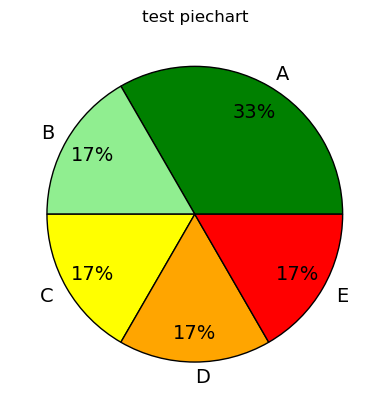

In [386]:
# Test unitaire de piechart()
piechart(['A', 'B', 'C', 'D', 'E', 'A'], titre='test piechart')

### Fonction analyse_du_regime()

Calcule le Regimescore de tous les produits de la base de données openfoodfacts, et retourne un piechart pour la distribution des notes du Régimescore.
  
Arguments :  
    - liste : liste des variables du régime.  
    - titre : string pour le titre du chart.

In [373]:
def analyse_du_regime(liste, titre="sans titre"):
    # Extraction des lignes du df1 qui permettent de calculer un Régimescore : 
    assert len(liste) != 0, "il y a zéro variable de régime"
    ser_bool = df1[liste[0]].notnull()     # lignes non null
    for x in range(1, len(liste)):
        ser_bool = ser_bool & df1[liste[x]].notnull()
    indexes_regime = df1[ser_bool].index     # liste des indexes de df1 contenant une valeur pour toutes les variables
    # Calcul de tous les Régimescores pour un régime :
    liste_regimescores = []
    for i in indexes_regime:
        liste_regimescores.append(regimescore(liste, i, print_teneurs=False))
    # Tracé d'un pie chart
    proportion = round(len(liste_regimescores)/len(df1)*100)
    piechart(liste_regimescores, titre=titre+f"\n({proportion}% des produits sont renseignés)")

### Régime sans cholestérol et sans sel

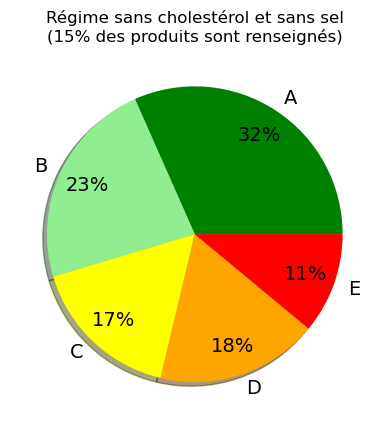

In [374]:
liste_variables_regime = ['cholesterol_100g', 'salt_100g']
analyse_du_regime(liste_variables_regime, titre = "Régime sans cholestérol et sans sel")

### Régime sans sucre et sans gras

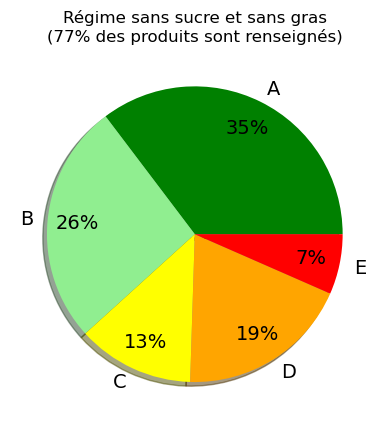

In [375]:
liste_variables_regime = ['sugars_100g', 'fat_100g']
analyse_du_regime(liste_variables_regime, titre = "Régime sans sucre et sans gras")

### Régime sans sucre, sans gras et sans sel

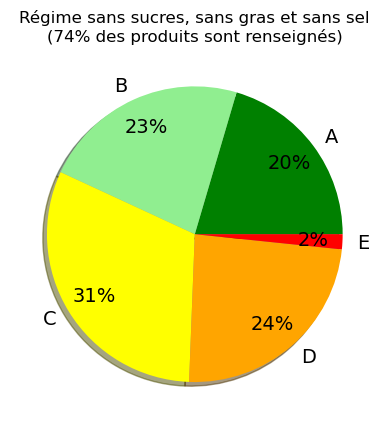

In [376]:
liste_variables_regime = ['sugars_100g', 'fat_100g', 'salt_100g']
analyse_du_regime(liste_variables_regime, titre = "Régime sans sucres, sans gras et sans sel")